# Package Installation 

In [1]:
# %pip install ucimlrepo
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install scipy

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

%matplotlib inline

# Loading dataset
- read csv file path from uci repo
- open csv file with pandas, to use pandas function 

In [3]:
# get dataset from uci repo 
creditApproval = fetch_ucirepo(id=27) 

# metadata - get csv file
ca_csv = creditApproval.metadata.data_url
print(ca_csv) 

https://archive.ics.uci.edu/static/public/27/data.csv


In [4]:
# open csv file with pandas dataframe 
ca_df = pd.read_csv(ca_csv)

ca_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


# Data Exploration

In [5]:
# get the number of row and column by pandas ( row, col )
ca_df.shape

(690, 16)

In [6]:
# display all column name 
ca_df.columns.values

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16'], dtype=object)

In [7]:
# check each col datatype 
ca_df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [8]:
# get the summary by dataframes
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


##### NOTE: 
- total 16 column and 7 column have missing value
  - A1, 2, 4, 5, 6, 7, 14 ( MISSING VALUE )
- 4 is in float, 2 in integer and 10 in object 

In [9]:
# view all columns statistics result including min, max, mean and count 
ca_df.describe(include='all')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,678,678.000000,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677.000000,690.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,NaN,NaN,383
mean,NaN,31.568171,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,184.014771,1017.385507,NaN
std,NaN,11.957862,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.806768,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,75.000000,0.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.230000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,276.000000,395.500000,NaN


##### NOTE:
- freq is the most common value’s frequency

In [10]:
# get first few row data 
ca_df.head(20)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


In [11]:
# get last few row data 
ca_df.tail(20)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,465.0,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,0.0,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,240.0,117,-
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,256.0,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,260.0,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,240.0,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,129.0,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,100.0,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,0.0,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,0.0,0,-


## Data Visualization 

### Pie Chart ( Categorical data )
- categorical data
  - how many category
  - each category how many percentage

In [12]:
# show out all column with categorical data 
ca_df.describe(exclude=[np.number])

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [13]:
colorMap = [
            '#7695FF',
            '#9DBDFF',
            '#FF9874', 
            '#FFD7C4',
            '#F6E96B', 
            '#BEDC74',
            '#A2CA71',
            '#FF8C9E',
            '#FF8225', 
            '#EF5A6F', 
            '#6C946F',
            '#E68369',
            '#DCA47C', 
            '#36BA98'
            ]

def colorShuffle():
    random.shuffle(colorMap)

len(colorMap)

14

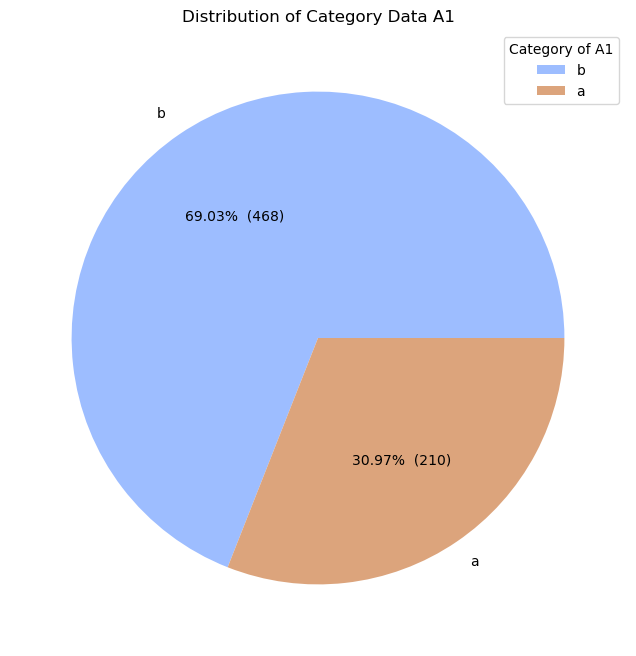

In [14]:
# get the category exist in the col A1 and distribute of the data 
aone_dis = ca_df['A1'].value_counts()

# function for control the auto percentage format 
def autopct_format(percentage, values):
    # sum the category a and b together and get total 
    total = sum(values)

    # convert percentage back to number 
    val = int(round(percentage*total/100.0))
    
    return f'{percentage:.2f}%  ({val:d})' # .2%, two decimal point, the other 2 % is the format 

colorShuffle()

# create a pie chart 
plt.figure(figsize=(10,8)) 
plt.pie(aone_dis, labels=aone_dis.index, autopct=lambda percentage: autopct_format(percentage, aone_dis), colors=colorMap) 
plt.title("Distribution of Category Data A1")
plt.legend(title="Category of A1")
plt.show() 

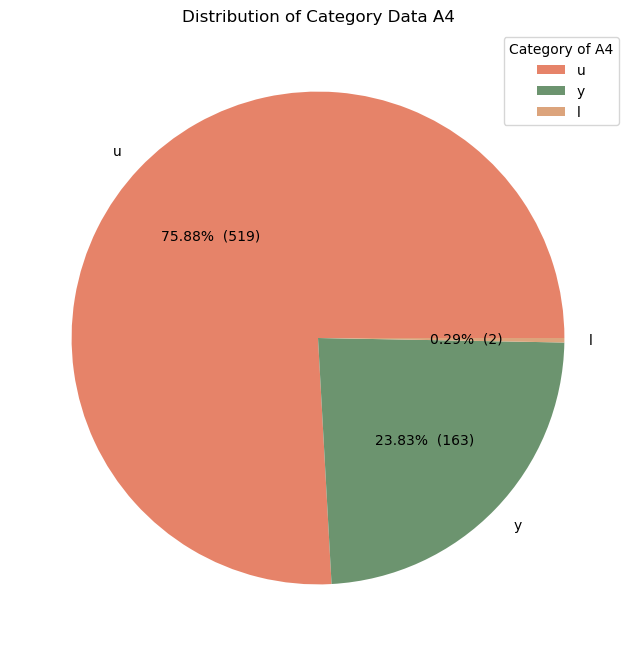

In [15]:
# get the category exist in the col A4 and distribute of the data 
afour_dis = ca_df['A4'].value_counts()

colorShuffle()

# create a pie chart 
plt.figure(figsize=(10,8)) 
plt.pie(afour_dis, labels=afour_dis.index, autopct=lambda percentage: autopct_format(percentage, afour_dis), colors=colorMap) 
plt.title("Distribution of Category Data A4")
plt.legend(title="Category of A4")
plt.show() 

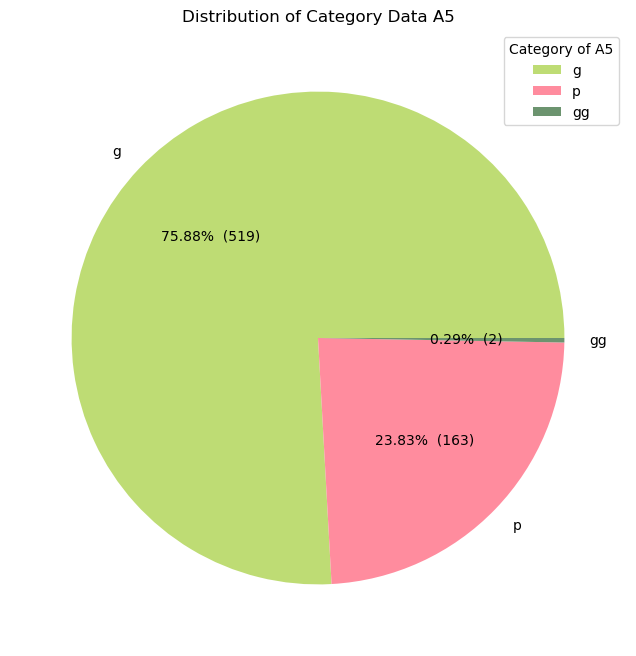

In [16]:
# get the category exist in the col A5 and distribute of the data 
afive_dis = ca_df['A5'].value_counts()

colorShuffle()

# create a pie chart 
plt.figure(figsize=(10,8)) 
plt.pie(afive_dis, labels=afive_dis.index, autopct=lambda percentage: autopct_format(percentage, afive_dis), colors=colorMap) 
plt.title("Distribution of Category Data A5")
plt.legend(title="Category of A5")
plt.show() 

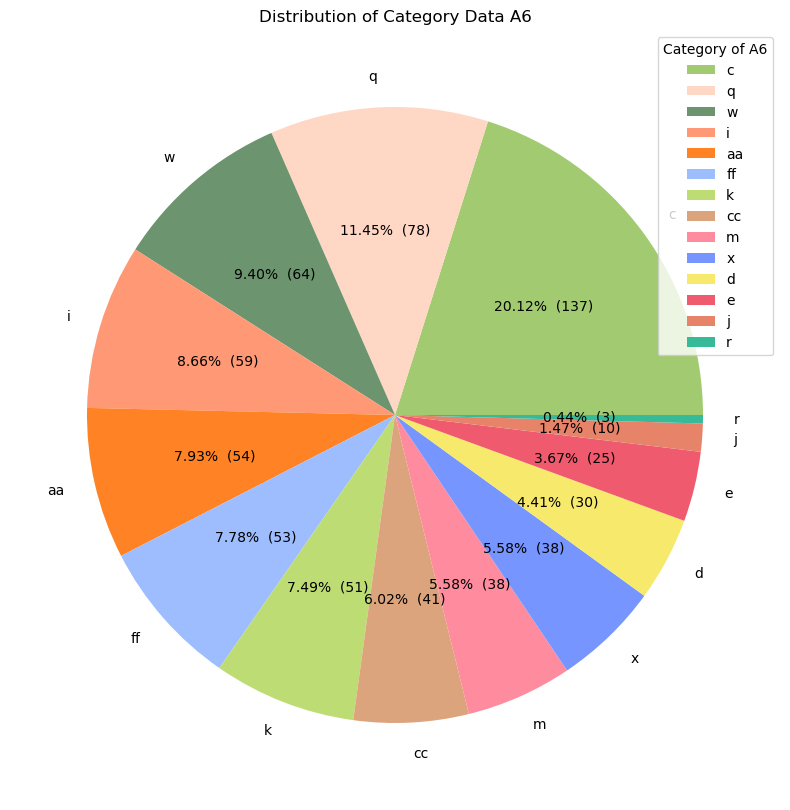

In [17]:
# get the category exist in the col A6 and distribute of the data 
asix_dis = ca_df['A6'].value_counts()

colorShuffle()

# create a pie chart 
plt.figure(figsize=(11,10)) 
plt.pie(asix_dis, labels=asix_dis.index, autopct=lambda percentage: autopct_format(percentage, asix_dis), colors=colorMap) 
plt.title("Distribution of Category Data A6")
plt.legend(title="Category of A6")
plt.show() 

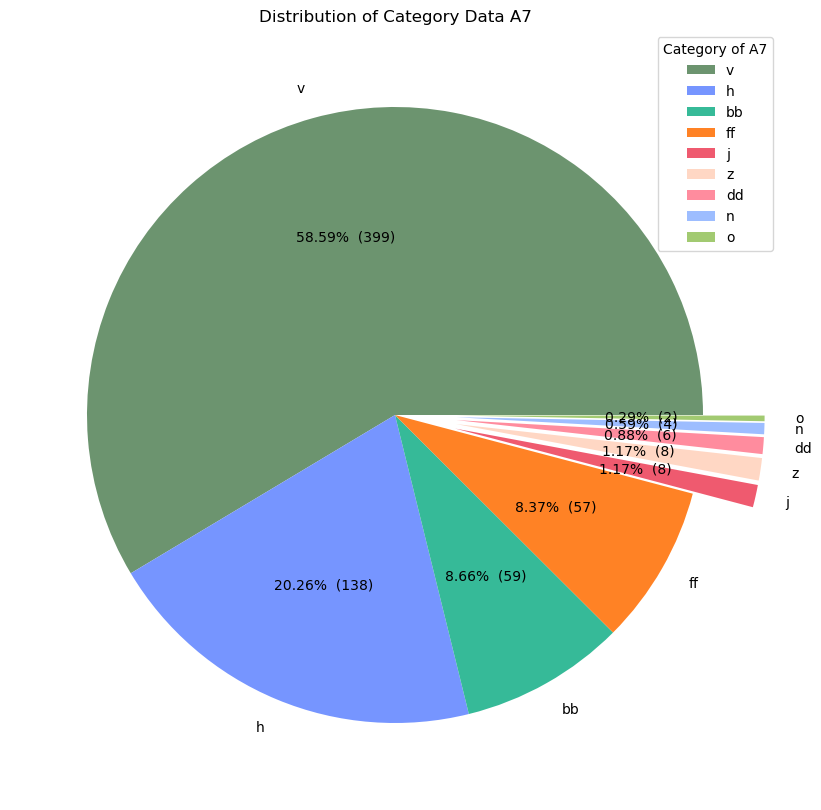

In [18]:
# get the category exist in the col A7 and distribute of the data 
aseven_dis = ca_df['A7'].value_counts()

colorShuffle()

# set explode value
# explode the small distribution category so can clearly visualize it 
explode = (0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.2)

# create a pie chart 
plt.figure(figsize=(11,10)) 
plt.pie(aseven_dis, labels=aseven_dis.index, autopct=lambda percentage: autopct_format(percentage, aseven_dis), colors=colorMap, explode=explode) 
plt.title("Distribution of Category Data A7")
plt.legend(title="Category of A7")
plt.show() 

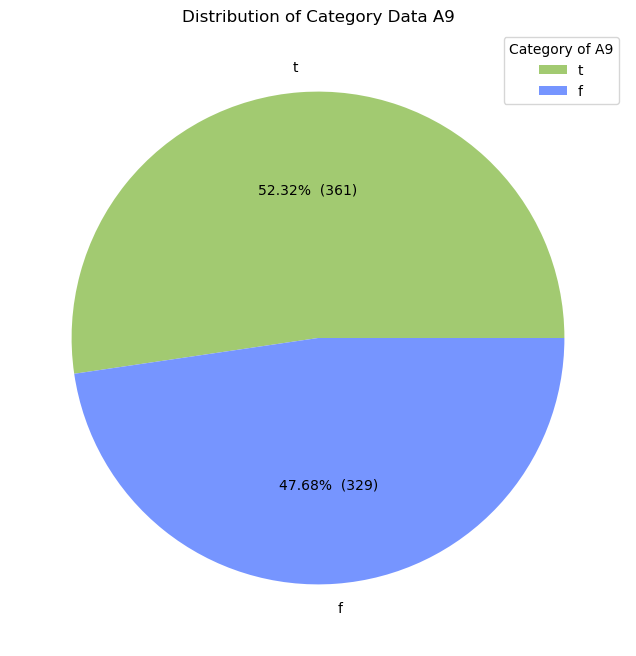

In [19]:
# get the category exist in the col A9 and distribute of the data 
anine_dis = ca_df['A9'].value_counts()

colorShuffle()

# create a pie chart 
plt.figure(figsize=(10,8)) 
plt.pie(anine_dis, labels=anine_dis.index, autopct=lambda percentage: autopct_format(percentage, anine_dis), colors=colorMap) 
plt.title("Distribution of Category Data A9")
plt.legend(title="Category of A9")
plt.show() 

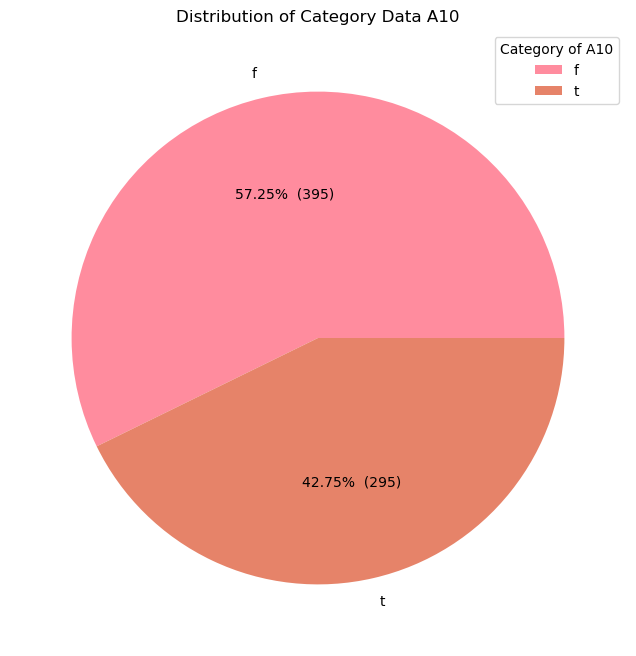

In [20]:
# get the category exist in the col A10 and distribute of the data 
aten_dis = ca_df['A10'].value_counts()

colorShuffle()

# create a pie chart 
plt.figure(figsize=(10,8)) 
plt.pie(aten_dis, labels=aten_dis.index, autopct=lambda percentage: autopct_format(percentage, aten_dis), colors=colorMap) 
plt.title("Distribution of Category Data A10")
plt.legend(title="Category of A10")
plt.show() 

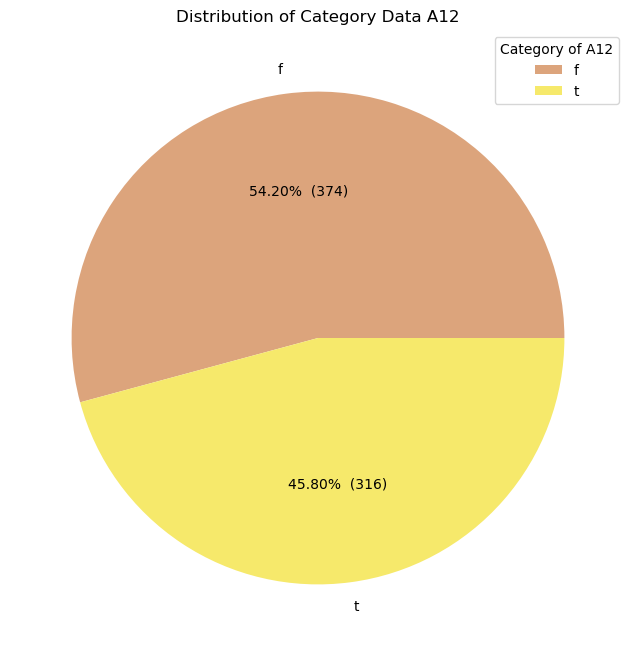

In [21]:
# get the category exist in the col A12 and distribute of the data 
atwe_dis = ca_df['A12'].value_counts()

colorShuffle()

# create a pie chart 
plt.figure(figsize=(10,8)) 
plt.pie(atwe_dis, labels=atwe_dis.index, autopct=lambda percentage: autopct_format(percentage, atwe_dis), colors=colorMap) 
plt.title("Distribution of Category Data A12")
plt.legend(title="Category of A12")
plt.show() 

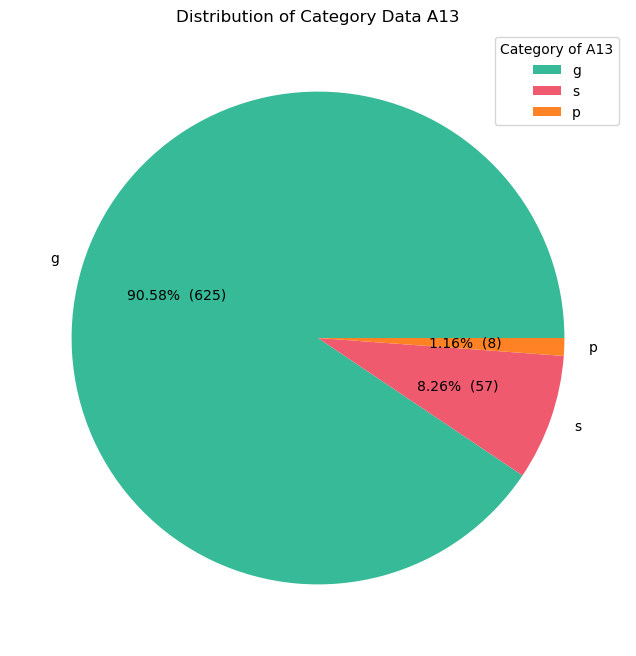

In [22]:
# get the category exist in the col A13 and distribute of the data 
athird_dis = ca_df['A13'].value_counts()

colorShuffle()

# create a pie chart 
plt.figure(figsize=(10,8)) 
plt.pie(athird_dis, labels=athird_dis.index, autopct=lambda percentage: autopct_format(percentage, athird_dis), colors=colorMap) 
plt.title("Distribution of Category Data A13")
plt.legend(title="Category of A13")
plt.show() 

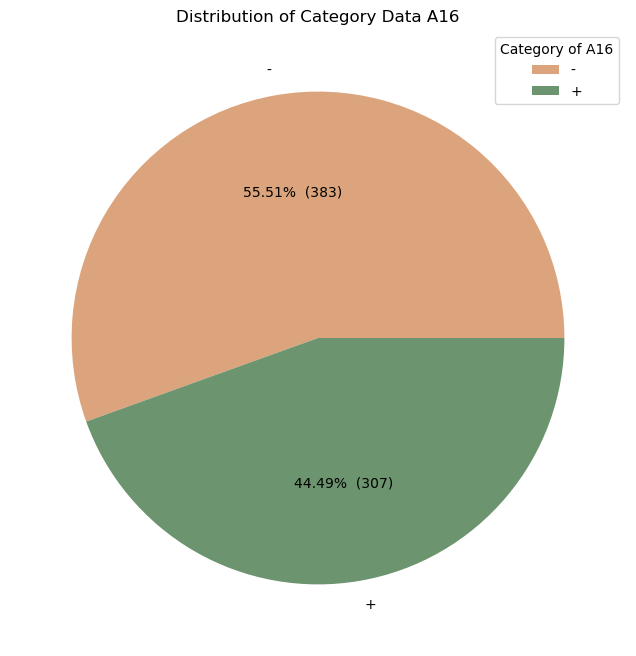

In [23]:
# get the category exist in the col A16 and distribute of the data 
asixty_dis = ca_df['A16'].value_counts()

colorShuffle()

# create a pie chart 
plt.figure(figsize=(10,8)) 
plt.pie(asixty_dis, labels=asixty_dis.index, autopct=lambda percentage: autopct_format(percentage, asixty_dis), colors=colorMap) 
plt.title("Distribution of Category Data A16")
plt.legend(title="Category of A16")
plt.show() 

# possible came out bias

### Grouped Bar Chart ( Categorical data )
https://seaborn.pydata.org/archive/0.11/generated/seaborn.countplot.html 

<br>
advanced : https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html 

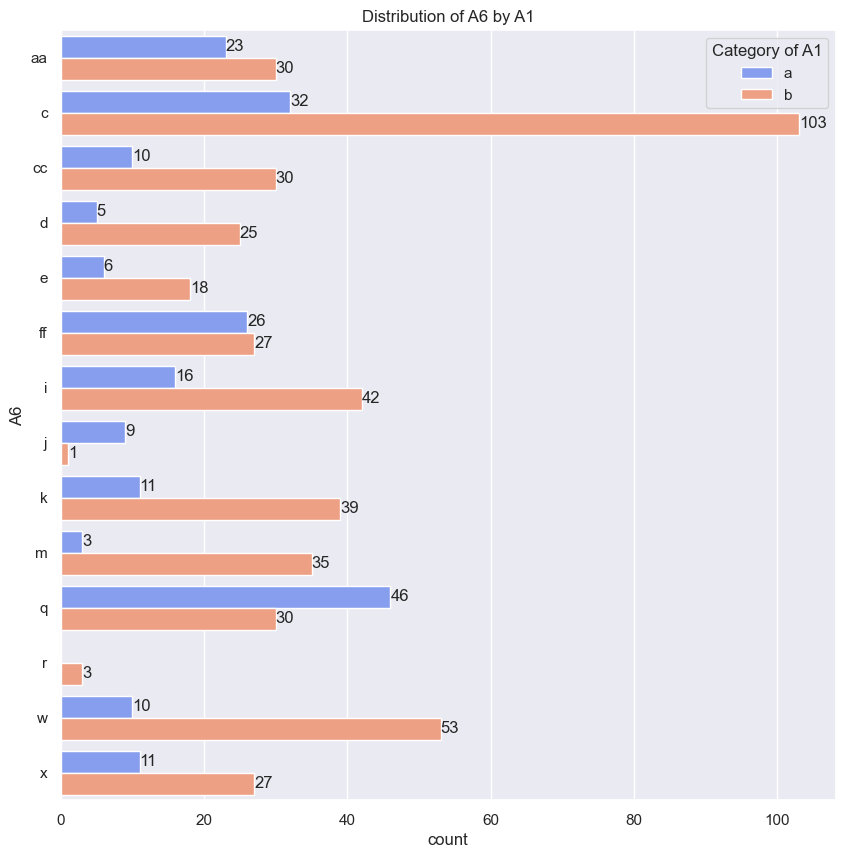

In [24]:
colorShuffle()

# set x-axis and hue order
y = ca_df['A6'].value_counts().sort_index().index
hue = ca_df['A1'].value_counts().sort_index().index

# create graph
plt.figure(figsize=(10,10)) 
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=ca_df, y="A6", hue="A1", order=y, hue_order=hue, palette=[colorMap[0], colorMap[1]])
ax.legend(title="Category of A1")
plt.title("Distribution of A6 by A1")

# Add the exact number of instances on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()

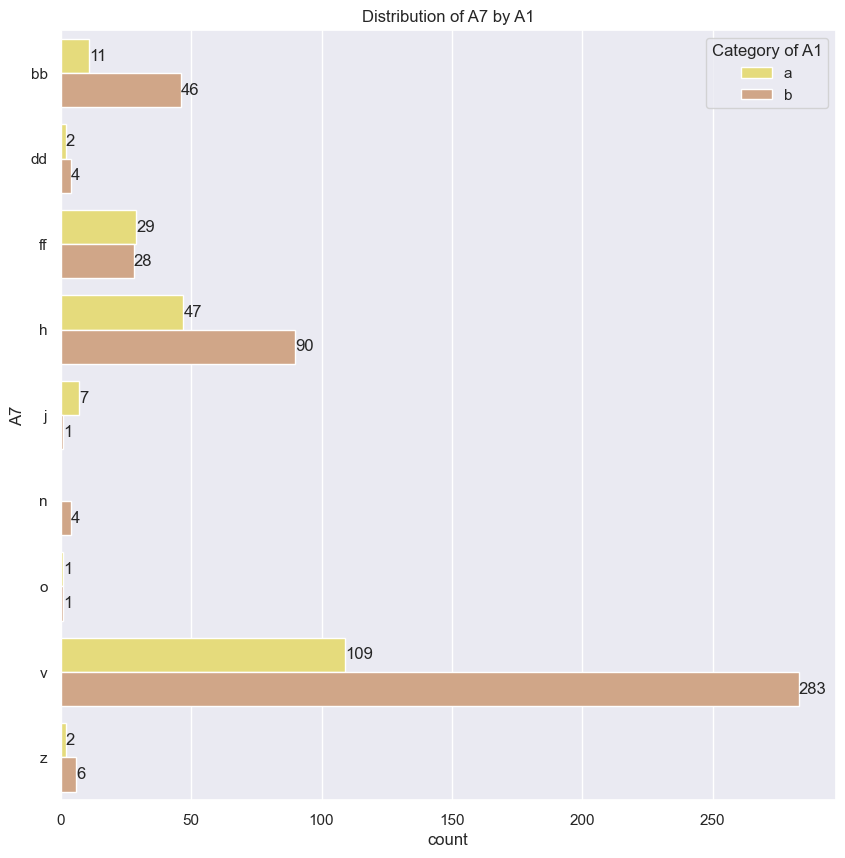

In [25]:
colorShuffle()

# set x-axis and hue order
y = ca_df['A7'].value_counts().sort_index().index
hue = ca_df['A1'].value_counts().sort_index().index

# create graph
plt.figure(figsize=(10,10)) 
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=ca_df, y="A7", hue="A1", order=y, hue_order=hue, palette=[colorMap[0], colorMap[1]])
ax.legend(title="Category of A1")
plt.title("Distribution of A7 by A1")

# Add the exact number of instances on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()

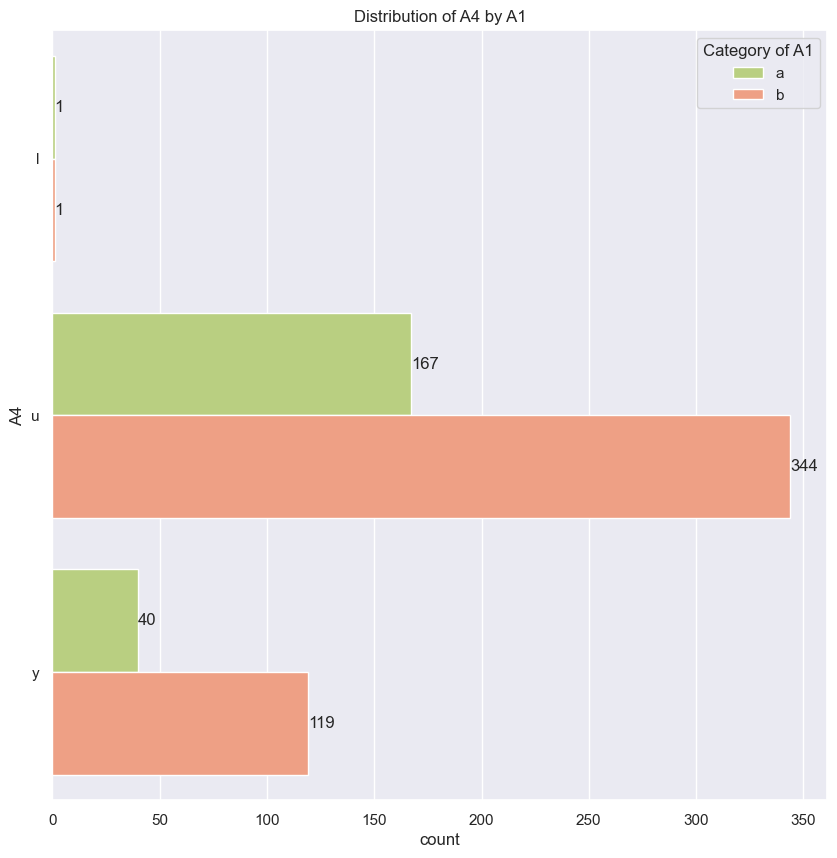

In [26]:
colorShuffle()

# set x-axis and hue order
y = ca_df['A4'].value_counts().sort_index().index
hue = ca_df['A1'].value_counts().sort_index().index

# create graph
plt.figure(figsize=(10,10)) 
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=ca_df, y="A4", hue="A1", order=y, hue_order=hue, palette=[colorMap[0], colorMap[1]])
ax.legend(title="Category of A1")
plt.title("Distribution of A4 by A1")

# Add the exact number of instances on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()

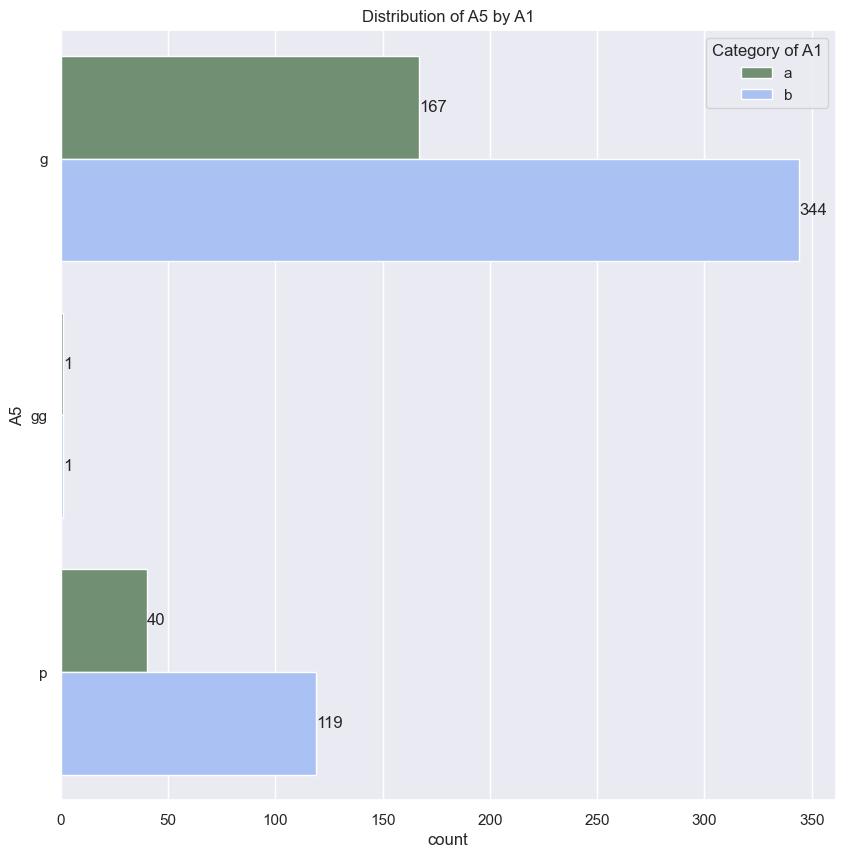

In [27]:
colorShuffle()

# set x-axis and hue order
y = ca_df['A5'].value_counts().sort_index().index
hue = ca_df['A1'].value_counts().sort_index().index

# create graph
plt.figure(figsize=(10,10)) 
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=ca_df, y="A5", hue="A1", order=y, hue_order=hue, palette=[colorMap[0], colorMap[1]])
ax.legend(title="Category of A1")
plt.title("Distribution of A5 by A1")

# Add the exact number of instances on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()

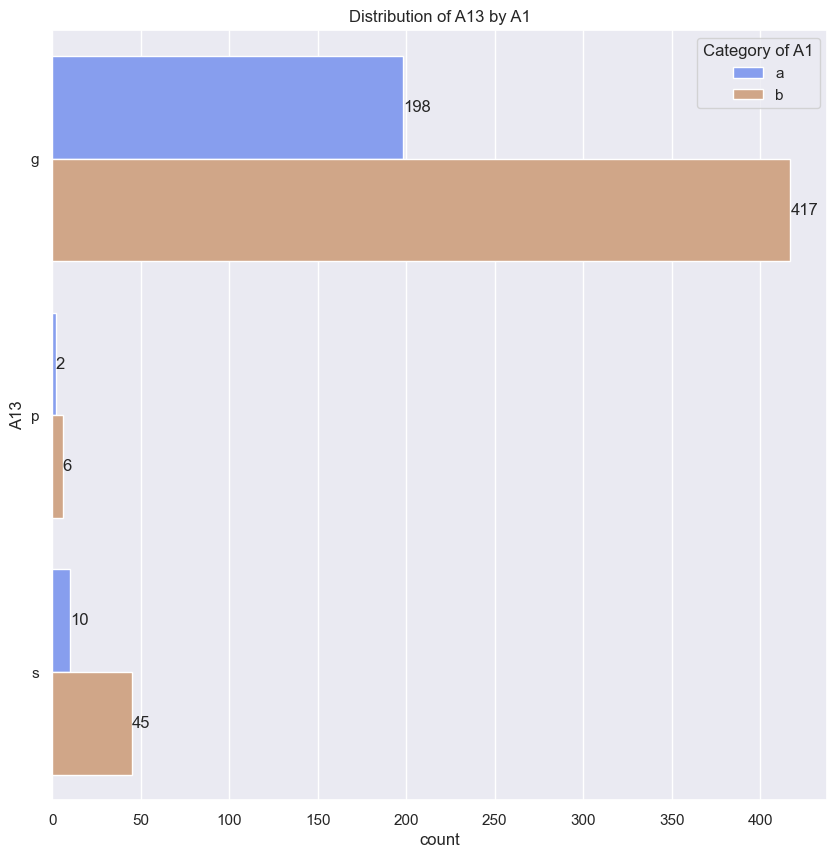

In [28]:
colorShuffle()

# set x-axis and hue order
y = ca_df['A13'].value_counts().sort_index().index
hue = ca_df['A1'].value_counts().sort_index().index

# create graph
plt.figure(figsize=(10,10)) 
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=ca_df, y="A13", hue="A1", order=y, hue_order=hue, palette=[colorMap[0], colorMap[1]])
ax.legend(title="Category of A1")
plt.title("Distribution of A13 by A1")

# Add the exact number of instances on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()

### Heatmap ( Categorical data )
- A9, 10, 12

> due to **A1 have missing value**, so here only show 678 data <br>
> if want to change can using A16 to change 

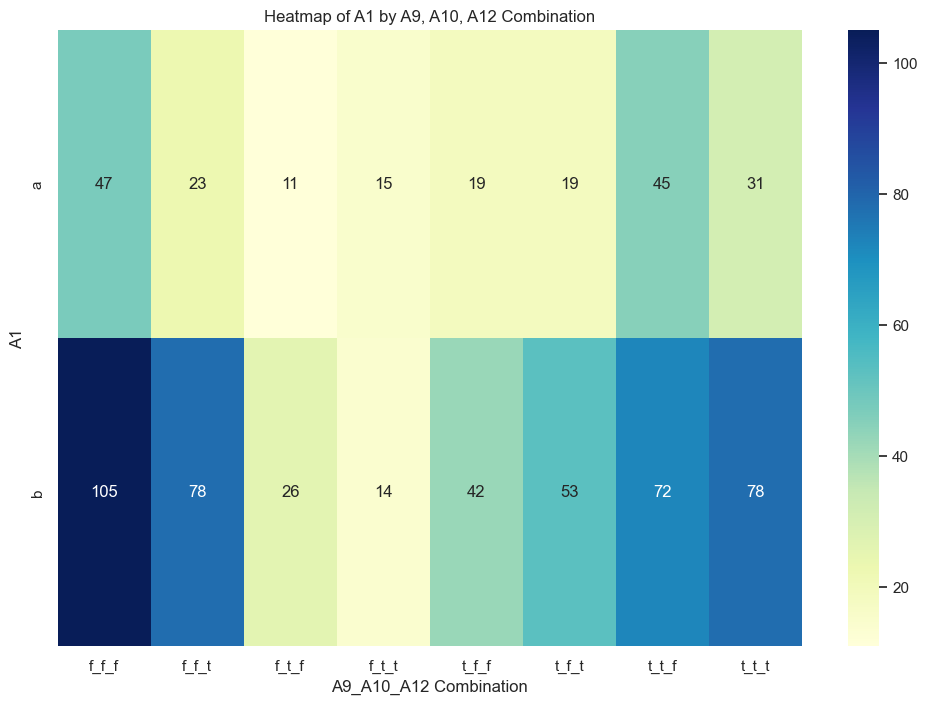

In [29]:
cpy_df = ca_df.copy()

# Combine A9 and A10 and A11 to create a unique key
cpy_df['A9_A10_A12'] = cpy_df['A9'].astype(str) + "_" + cpy_df['A10'].astype(str) + "_" + cpy_df['A12'].astype(str)

# Create a pivot table with A1 as values and A9_A10 as columns
pivot_table = cpy_df.pivot_table(index='A1', columns='A9_A10_A12', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='d')
plt.title("Heatmap of A1 by A9, A10, A12 Combination")
plt.xlabel("A9_A10_A12 Combination")
plt.ylabel("A1")
plt.show()

### Histogram with Box plot ( Continuous data )

In [30]:
# get all columns with continuous data 
ca_df.describe(exclude=["object"])

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


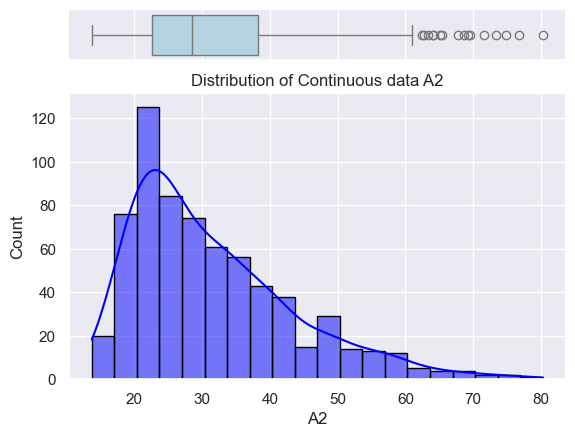

In [31]:
# target data 
x = ca_df['A2']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# box plot 
sns.boxplot(x=x, ax=ax_box, color='lightblue')

# histogram 
sns.histplot(x=x, bins=20, kde=True, ax=ax_hist, color='blue', edgecolor='black')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

plt.title("Distribution of Continuous data A2")

plt.show()

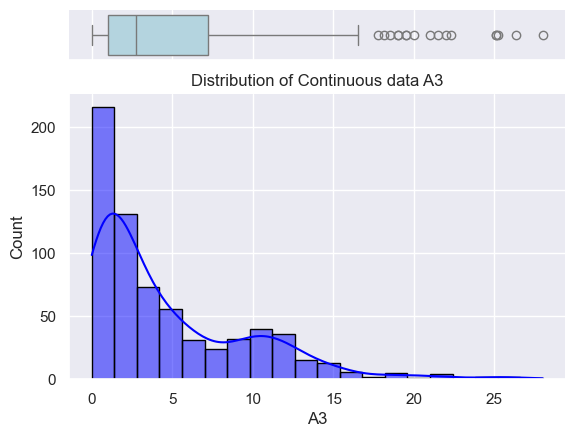

In [32]:
# target data 
x = ca_df['A3']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# box plot 
sns.boxplot(x=x, ax=ax_box, color='lightblue')

# histogram 
sns.histplot(x=x, bins=20, kde=True, ax=ax_hist, color='blue', edgecolor='black')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

plt.title("Distribution of Continuous data A3")

plt.show()

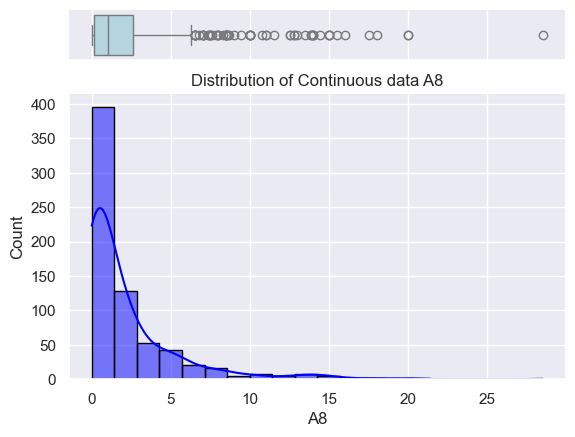

In [33]:
# target data 
x = ca_df['A8']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# box plot 
sns.boxplot(x=x, ax=ax_box, color='lightblue')

# histogram 
sns.histplot(x=x, bins=20, kde=True, ax=ax_hist, color='blue', edgecolor='black')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

plt.title("Distribution of Continuous data A8")

plt.show()

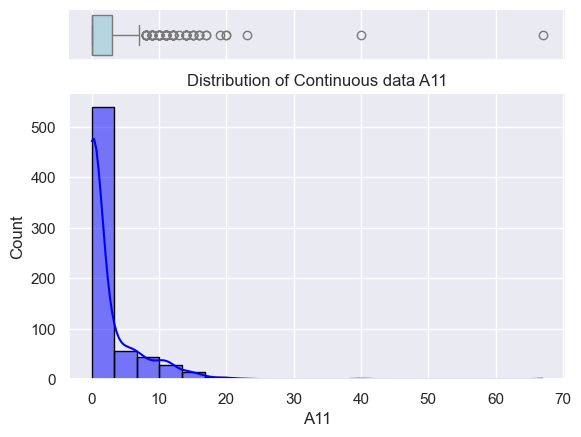

In [34]:
# target data 
x = ca_df['A11']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# box plot 
sns.boxplot(x=x, ax=ax_box, color='lightblue')

# histogram 
sns.histplot(x=x, bins=20, kde=True, ax=ax_hist, color='blue', edgecolor='black')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

plt.title("Distribution of Continuous data A11")

plt.show()

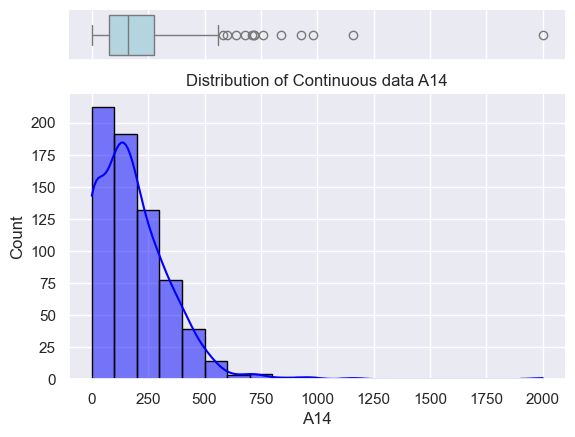

In [35]:
# target data 
x = ca_df['A14']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# box plot 
sns.boxplot(x=x, ax=ax_box, color='lightblue')

# histogram 
sns.histplot(x=x, bins=20, kde=True, ax=ax_hist, color='blue', edgecolor='black')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

plt.title("Distribution of Continuous data A14")

plt.show()

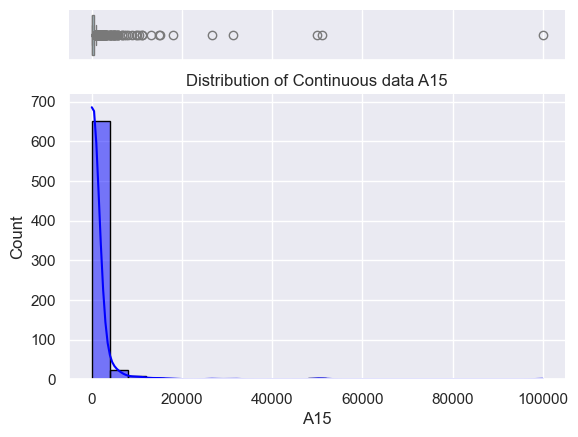

In [36]:
# target data 
x = ca_df['A15']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# box plot 
sns.boxplot(x=x, ax=ax_box, color='lightblue')

# histogram 
sns.histplot(x=x, bins=25, kde=True, ax=ax_hist, color='blue', edgecolor='black')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

plt.title("Distribution of Continuous data A15")

plt.show()

# Data Preparation

## Data Cleaning 

### Eliminate Duplicate Data 

In [37]:
# get duplicated row 
ca_df.duplicated().sum()

0

### Handling Missing Value 

In [38]:
ca_df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

- Categorical Data : A1, A4, A5, A6, A7
  - replace with **Last Observation Carried Forward (LOCF)**
- Continuous Data : A2, A14
  - replace with **median**

#### Categorical Data 

##### A1

In [39]:
# show all columns that A1 is NaN
# get True False map
bo = pd.isnull(ca_df['A1']) 

# only display True
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
248,NaN,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,73.0,444,+
327,NaN,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160.0,0,-
346,NaN,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372.0,122,-
374,NaN,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260.0,1004,-
453,NaN,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300.0,0,-
479,NaN,26.50,2.710,y,p,NaN,NaN,0.085,f,f,0,f,s,80.0,0,-
489,NaN,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,263.0,0,-
520,NaN,20.42,7.500,u,g,k,v,1.500,t,t,1,f,g,160.0,234,+
598,NaN,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,240.0,768,+
601,NaN,42.25,1.750,y,p,NaN,NaN,0.000,f,f,0,t,g,150.0,1,-


In [40]:
# using Last Observation Carried Forward (LOCF) 
ca_df['A1'] = ca_df['A1'].ffill()

ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
248,a,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,73.0,444,+
327,b,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160.0,0,-
346,b,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372.0,122,-
374,b,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260.0,1004,-
453,b,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300.0,0,-
479,b,26.50,2.710,y,p,NaN,NaN,0.085,f,f,0,f,s,80.0,0,-
489,b,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,263.0,0,-
520,b,20.42,7.500,u,g,k,v,1.500,t,t,1,f,g,160.0,234,+
598,a,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,240.0,768,+
601,a,42.25,1.750,y,p,NaN,NaN,0.000,f,f,0,t,g,150.0,1,-


##### Show again A1 distribute

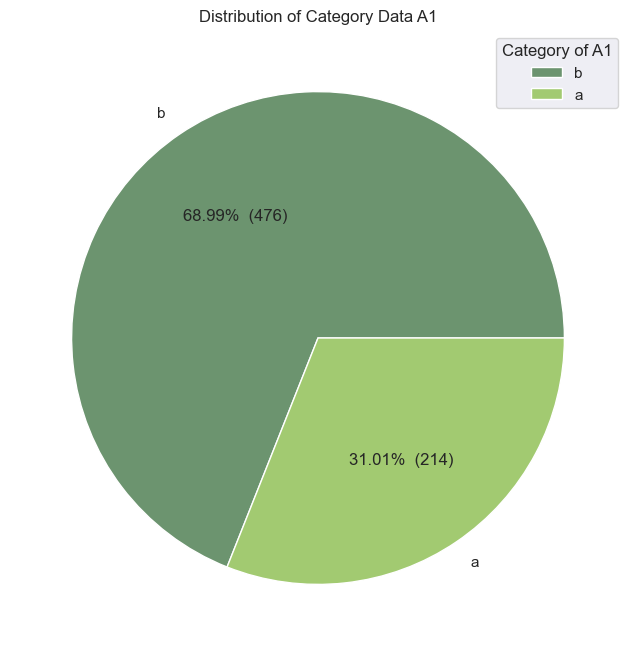

In [41]:
# show again 
# get the category exist in the col A1 and distribute of the data 
aone_dis = ca_df['A1'].value_counts()

# function for control the auto percentage format 
def autopct_format(percentage, values):
    # sum the category a and b together and get total 
    total = sum(values)

    # convert percentage back to number 
    val = int(round(percentage*total/100.0))
    
    return f'{percentage:.2f}%  ({val:d})' # .2%, two decimal point, the other 2 % is the format 

colorShuffle()

# create a pie chart 
plt.figure(figsize=(10,8)) 
plt.pie(aone_dis, labels=aone_dis.index, autopct=lambda percentage: autopct_format(percentage, aone_dis), colors=colorMap) 
plt.title("Distribution of Category Data A1")
plt.legend(title="Category of A1")
plt.show() 

##### A4

In [42]:
# show all columns that A4 is NaN
# get True False map
bo = pd.isnull(ca_df['A4']) 

# only display True
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,+
270,b,37.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,+
330,b,20.42,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,-
456,b,34.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,-
592,b,23.17,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,+
622,a,25.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,+


In [43]:
# using Last Observation Carried Forward (LOCF) 
ca_df['A4'] = ca_df['A4'].ffill()

ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,+
270,b,37.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,+
330,b,20.42,0.0,y,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,-
456,b,34.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,-
592,b,23.17,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,+
622,a,25.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,+


##### Show again A4 distribute 

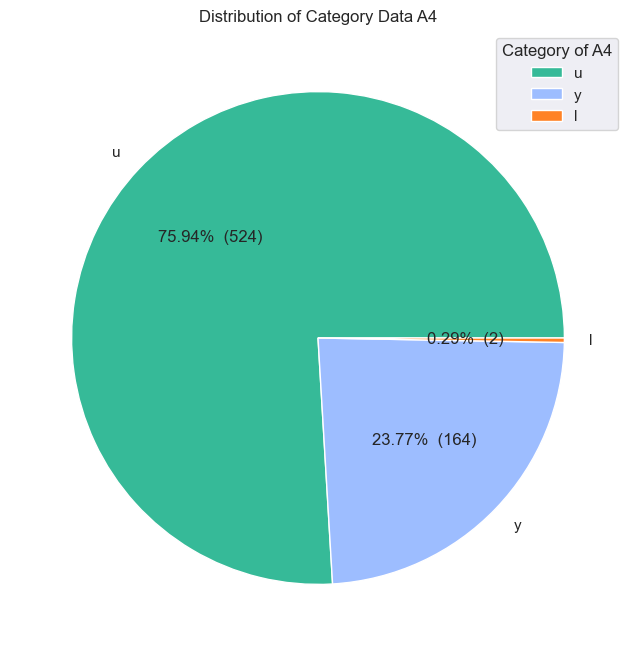

In [44]:
# get the category exist in the col A4 and distribute of the data 
afour_dis = ca_df['A4'].value_counts()

colorShuffle()

# create a pie chart 
plt.figure(figsize=(10,8)) 
plt.pie(afour_dis, labels=afour_dis.index, autopct=lambda percentage: autopct_format(percentage, afour_dis), colors=colorMap) 
plt.title("Distribution of Category Data A4")
plt.legend(title="Category of A4")
plt.show() 

##### A5

In [45]:
# show all columns that A5 is NaN
# get True False map
bo = pd.isnull(ca_df['A5']) 

# only display True
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,+
270,b,37.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,+
330,b,20.42,0.0,y,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,-
456,b,34.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,-
592,b,23.17,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,+
622,a,25.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,NaN,0,+


In [46]:
# using Last Observation Carried Forward (LOCF) 
ca_df['A5'] = ca_df['A5'].ffill()

ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.0,u,g,NaN,NaN,0.0,f,f,0,f,p,NaN,0,+
270,b,37.58,0.0,u,g,NaN,NaN,0.0,f,f,0,f,p,NaN,0,+
330,b,20.42,0.0,y,p,NaN,NaN,0.0,f,f,0,f,p,NaN,0,-
456,b,34.58,0.0,u,g,NaN,NaN,0.0,f,f,0,f,p,NaN,0,-
592,b,23.17,0.0,u,g,NaN,NaN,0.0,f,f,0,f,p,NaN,0,+
622,a,25.58,0.0,u,g,NaN,NaN,0.0,f,f,0,f,p,NaN,0,+


##### Show again A5 distribute

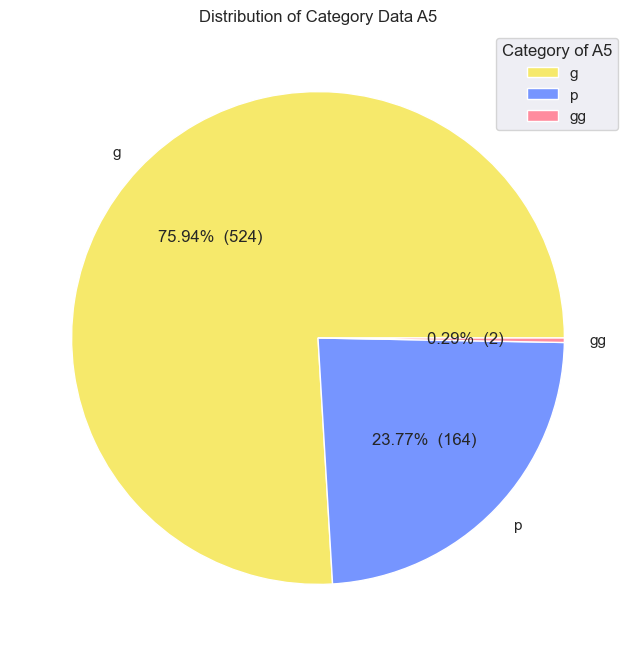

In [47]:
# get the category exist in the col A5 and distribute of the data 
afive_dis = ca_df['A5'].value_counts()

colorShuffle()

# create a pie chart 
plt.figure(figsize=(10,8)) 
plt.pie(afive_dis, labels=afive_dis.index, autopct=lambda percentage: autopct_format(percentage, afive_dis), colors=colorMap) 
plt.title("Distribution of Category Data A5")
plt.legend(title="Category of A5")
plt.show() 

##### A6

In [48]:
# show all columns that A6 is NaN
# get True False map
bo = pd.isnull(ca_df['A6']) 

# only display True
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.00,u,g,NaN,NaN,0.000,f,f,0,f,p,NaN,0,+
270,b,37.58,0.00,u,g,NaN,NaN,0.000,f,f,0,f,p,NaN,0,+
330,b,20.42,0.00,y,p,NaN,NaN,0.000,f,f,0,f,p,NaN,0,-
456,b,34.58,0.00,u,g,NaN,NaN,0.000,f,f,0,f,p,NaN,0,-
479,b,26.50,2.71,y,p,NaN,NaN,0.085,f,f,0,f,s,80.0,0,-
539,b,80.25,5.50,u,g,NaN,NaN,0.540,t,f,0,f,g,0.0,340,-
592,b,23.17,0.00,u,g,NaN,NaN,0.000,f,f,0,f,p,NaN,0,+
601,a,42.25,1.75,y,p,NaN,NaN,0.000,f,f,0,t,g,150.0,1,-
622,a,25.58,0.00,u,g,NaN,NaN,0.000,f,f,0,f,p,NaN,0,+


In [49]:
# using Last Observation Carried Forward (LOCF) 
ca_df['A6'] = ca_df['A6'].ffill()

ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.00,u,g,q,NaN,0.000,f,f,0,f,p,NaN,0,+
270,b,37.58,0.00,u,g,q,NaN,0.000,f,f,0,f,p,NaN,0,+
330,b,20.42,0.00,y,p,i,NaN,0.000,f,f,0,f,p,NaN,0,-
456,b,34.58,0.00,u,g,w,NaN,0.000,f,f,0,f,p,NaN,0,-
479,b,26.50,2.71,y,p,i,NaN,0.085,f,f,0,f,s,80.0,0,-
539,b,80.25,5.50,u,g,w,NaN,0.540,t,f,0,f,g,0.0,340,-
592,b,23.17,0.00,u,g,c,NaN,0.000,f,f,0,f,p,NaN,0,+
601,a,42.25,1.75,y,p,k,NaN,0.000,f,f,0,t,g,150.0,1,-
622,a,25.58,0.00,u,g,c,NaN,0.000,f,f,0,f,p,NaN,0,+


##### Show again A6 distribute

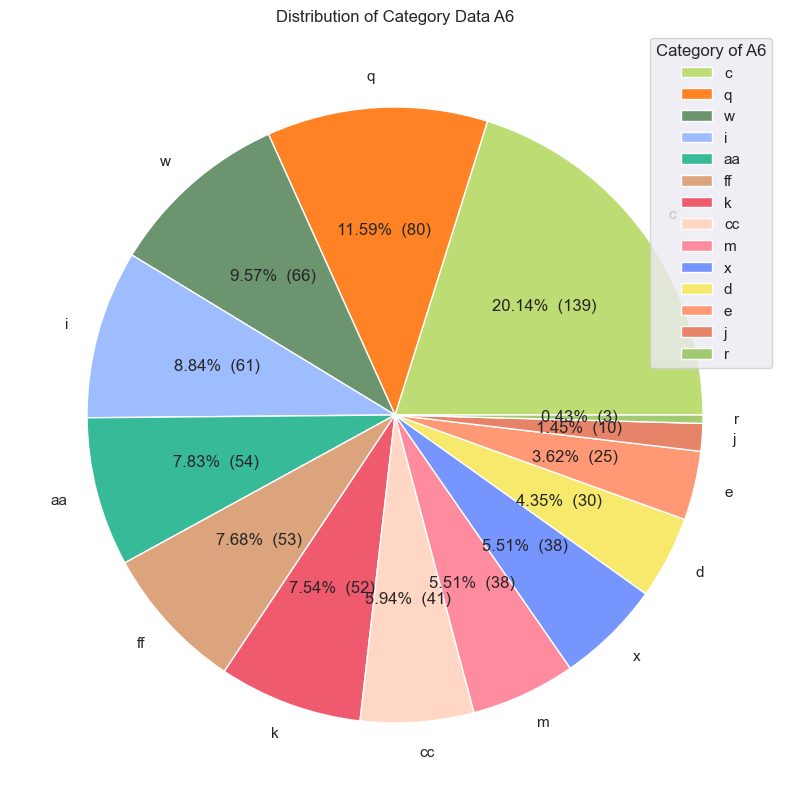

In [50]:
# get the category exist in the col A6 and distribute of the data 
asix_dis = ca_df['A6'].value_counts()

colorShuffle()

# create a pie chart 
plt.figure(figsize=(11,10)) 
plt.pie(asix_dis, labels=asix_dis.index, autopct=lambda percentage: autopct_format(percentage, asix_dis), colors=colorMap) 
plt.title("Distribution of Category Data A6")
plt.legend(title="Category of A6")
plt.show() 

##### A7

In [51]:
# show all columns that A7 is NaN
# get True False map
bo = pd.isnull(ca_df['A7']) 

# only display True
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.00,u,g,q,NaN,0.000,f,f,0,f,p,NaN,0,+
270,b,37.58,0.00,u,g,q,NaN,0.000,f,f,0,f,p,NaN,0,+
330,b,20.42,0.00,y,p,i,NaN,0.000,f,f,0,f,p,NaN,0,-
456,b,34.58,0.00,u,g,w,NaN,0.000,f,f,0,f,p,NaN,0,-
479,b,26.50,2.71,y,p,i,NaN,0.085,f,f,0,f,s,80.0,0,-
539,b,80.25,5.50,u,g,w,NaN,0.540,t,f,0,f,g,0.0,340,-
592,b,23.17,0.00,u,g,c,NaN,0.000,f,f,0,f,p,NaN,0,+
601,a,42.25,1.75,y,p,k,NaN,0.000,f,f,0,t,g,150.0,1,-
622,a,25.58,0.00,u,g,c,NaN,0.000,f,f,0,f,p,NaN,0,+


In [52]:
# using Last Observation Carried Forward (LOCF) 
ca_df['A7'] = ca_df['A7'].ffill()

ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.00,u,g,q,h,0.000,f,f,0,f,p,NaN,0,+
270,b,37.58,0.00,u,g,q,n,0.000,f,f,0,f,p,NaN,0,+
330,b,20.42,0.00,y,p,i,v,0.000,f,f,0,f,p,NaN,0,-
456,b,34.58,0.00,u,g,w,v,0.000,f,f,0,f,p,NaN,0,-
479,b,26.50,2.71,y,p,i,v,0.085,f,f,0,f,s,80.0,0,-
539,b,80.25,5.50,u,g,w,bb,0.540,t,f,0,f,g,0.0,340,-
592,b,23.17,0.00,u,g,c,h,0.000,f,f,0,f,p,NaN,0,+
601,a,42.25,1.75,y,p,k,v,0.000,f,f,0,t,g,150.0,1,-
622,a,25.58,0.00,u,g,c,j,0.000,f,f,0,f,p,NaN,0,+


##### Show again A7 distribute

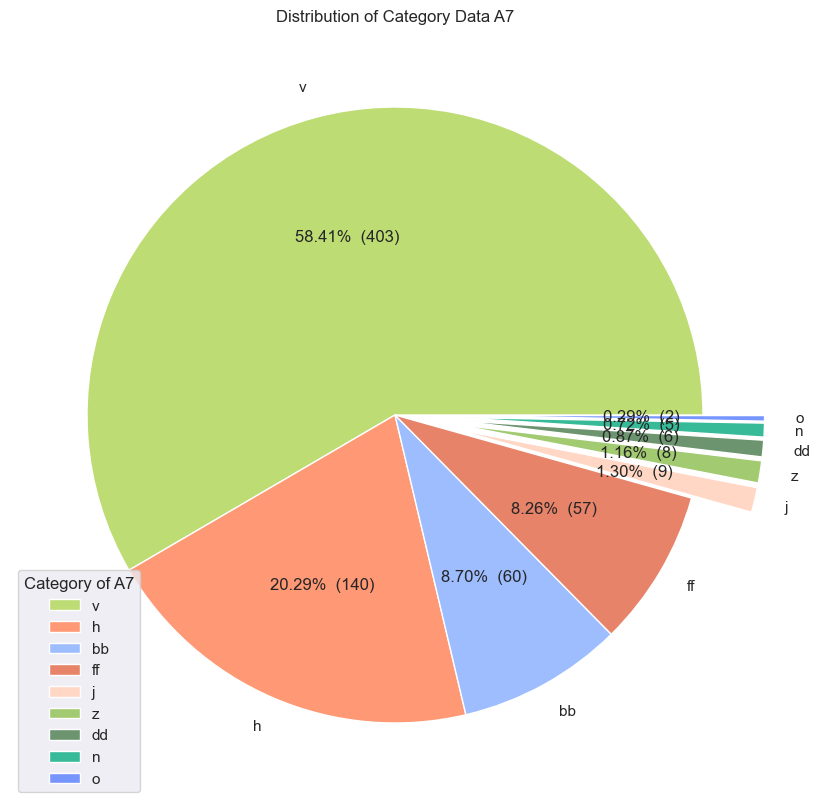

In [53]:
# get the category exist in the col A7 and distribute of the data 
aseven_dis = ca_df['A7'].value_counts()

colorShuffle()

# set explode value
# explode the small distribution category so can clearly visualize it 
explode = (0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.2)

# create a pie chart 
plt.figure(figsize=(11,10)) 
plt.pie(aseven_dis, labels=aseven_dis.index, autopct=lambda percentage: autopct_format(percentage, aseven_dis), colors=colorMap, explode=explode) 
plt.title("Distribution of Category Data A7")
plt.legend(title="Category of A7")
plt.show() 

#### Continuous Data 

##### A2

In [54]:
# take a look at the A2 data and data type
ca_df['A2'].head()

0    30.83
1    58.67
2    24.50
3    27.83
4    20.17
Name: A2, dtype: float64

In [55]:
# show all columns that A2 is NaN
# get True False map
bo = pd.isnull(ca_df['A2']) 

# only display True
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
83,a,NaN,3.500,u,g,d,v,3.000,t,f,0,t,g,300.0,0,-
86,b,NaN,0.375,u,g,d,v,0.875,t,f,0,t,s,928.0,0,-
92,b,NaN,5.000,y,p,aa,v,8.500,t,f,0,f,g,0.0,0,-
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,320.0,0,-
254,b,NaN,0.625,u,g,k,v,0.250,f,f,0,f,g,380.0,2010,-
286,a,NaN,1.500,u,g,ff,ff,0.000,f,t,2,t,g,200.0,105,-
329,b,NaN,4.000,y,p,i,v,0.085,f,f,0,t,g,411.0,0,-
445,a,NaN,11.250,u,g,ff,ff,0.000,f,f,0,f,g,NaN,5200,-
450,b,NaN,3.000,y,p,i,bb,7.000,f,f,0,f,g,0.0,1,-
500,b,NaN,4.000,u,g,x,v,5.000,t,t,3,t,g,290.0,2279,+


In [56]:
# get the median of A2 
median = ca_df['A2'].median()

ca_df['A2'] = ca_df['A2'].fillna(median)

ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
83,a,28.46,3.500,u,g,d,v,3.000,t,f,0,t,g,300.0,0,-
86,b,28.46,0.375,u,g,d,v,0.875,t,f,0,t,s,928.0,0,-
92,b,28.46,5.000,y,p,aa,v,8.500,t,f,0,f,g,0.0,0,-
97,b,28.46,0.500,u,g,c,bb,0.835,t,f,0,t,s,320.0,0,-
254,b,28.46,0.625,u,g,k,v,0.250,f,f,0,f,g,380.0,2010,-
286,a,28.46,1.500,u,g,ff,ff,0.000,f,t,2,t,g,200.0,105,-
329,b,28.46,4.000,y,p,i,v,0.085,f,f,0,t,g,411.0,0,-
445,a,28.46,11.250,u,g,ff,ff,0.000,f,f,0,f,g,NaN,5200,-
450,b,28.46,3.000,y,p,i,bb,7.000,f,f,0,f,g,0.0,1,-
500,b,28.46,4.000,u,g,x,v,5.000,t,t,3,t,g,290.0,2279,+


##### Show again A2 distribute

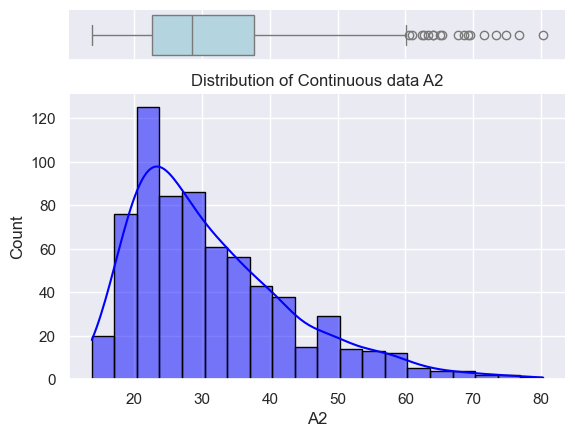

In [57]:
# target data 
x = ca_df['A2']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# box plot 
sns.boxplot(x=x, ax=ax_box, color='lightblue')

# histogram 
sns.histplot(x=x, bins=20, kde=True, ax=ax_hist, color='blue', edgecolor='black')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

plt.title("Distribution of Continuous data A2")

plt.show()

##### A14

In [58]:
# take a look at the A14 data and data type
ca_df['A14'].head()

0    202.0
1     43.0
2    280.0
3    100.0
4    120.0
Name: A14, dtype: float64

In [59]:
# show all columns that A14 is NaN
# get True False map
bo = pd.isnull(ca_df['A14']) 

# only display True
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,NaN,600,+
206,a,71.58,0.000,u,g,q,h,0.000,f,f,0,f,p,NaN,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,NaN,26726,+
270,b,37.58,0.000,u,g,q,n,0.000,f,f,0,f,p,NaN,0,+
278,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0,f,g,NaN,0,-
330,b,20.42,0.000,y,p,i,v,0.000,f,f,0,f,p,NaN,0,-
406,a,40.33,8.125,y,p,k,v,0.165,f,t,2,f,g,NaN,18,-
445,a,28.46,11.250,u,g,ff,ff,0.000,f,f,0,f,g,NaN,5200,-
456,b,34.58,0.000,u,g,w,v,0.000,f,f,0,f,p,NaN,0,-


In [60]:
# get the median of A14
median = ca_df['A14'].median()

ca_df['A14'] = ca_df['A14'].fillna(median)

ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,160.0,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,160.0,600,+
206,a,71.58,0.000,u,g,q,h,0.000,f,f,0,f,p,160.0,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,160.0,26726,+
270,b,37.58,0.000,u,g,q,n,0.000,f,f,0,f,p,160.0,0,+
278,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0,f,g,160.0,0,-
330,b,20.42,0.000,y,p,i,v,0.000,f,f,0,f,p,160.0,0,-
406,a,40.33,8.125,y,p,k,v,0.165,f,t,2,f,g,160.0,18,-
445,a,28.46,11.250,u,g,ff,ff,0.000,f,f,0,f,g,160.0,5200,-
456,b,34.58,0.000,u,g,w,v,0.000,f,f,0,f,p,160.0,0,-


##### Show again A14 distribute 

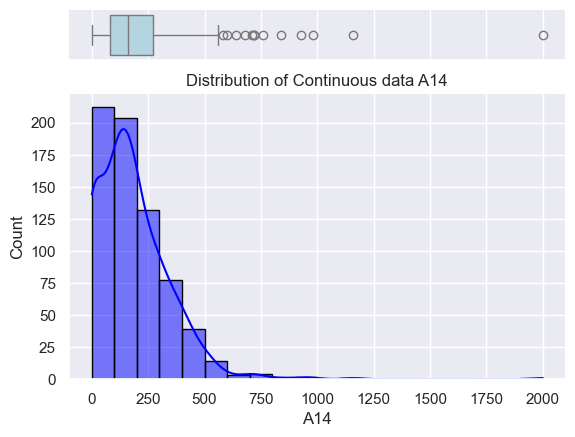

In [61]:
# target data 
x = ca_df['A14']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# box plot 
sns.boxplot(x=x, ax=ax_box, color='lightblue')

# histogram 
sns.histplot(x=x, bins=20, kde=True, ax=ax_hist, color='blue', edgecolor='black')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

plt.title("Distribution of Continuous data A14")

plt.show()

### Encode Categorical Data

In [62]:
# select all data type in object 
encodeList = ca_df.select_dtypes(include="object")

In [63]:
# encode categorical data with using OrdinalEncoder
encoder = OrdinalEncoder()

# Dictionary to store the mappings
mappings = {}

for col in encodeList.columns:
    encoder.fit(ca_df[[col]])
    ca_df[col] = encoder.fit_transform(ca_df[[col]])

    # Store the mapping of original values to encoded values
    # enumerate = convert to a list that have index number 
    # code, category = index and orginalLabel
    mappings[col] = {category: code for code, category in enumerate(encoder.categories_[0])}
        
ca_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1.0,30.83,0.000,1.0,0.0,12.0,7.0,1.25,1.0,1.0,1,0.0,0.0,202.0,0,0.0
1,0.0,58.67,4.460,1.0,0.0,10.0,3.0,3.04,1.0,1.0,6,0.0,0.0,43.0,560,0.0
2,0.0,24.50,0.500,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0,0.0,0.0,280.0,824,0.0
3,1.0,27.83,1.540,1.0,0.0,12.0,7.0,3.75,1.0,1.0,5,1.0,0.0,100.0,3,0.0
4,1.0,20.17,5.625,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0,0.0,2.0,120.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,21.08,10.085,2.0,2.0,4.0,3.0,1.25,0.0,0.0,0,0.0,0.0,260.0,0,1.0
686,0.0,22.67,0.750,1.0,0.0,1.0,7.0,2.00,0.0,1.0,2,1.0,0.0,200.0,394,1.0
687,0.0,25.25,13.500,2.0,2.0,5.0,2.0,2.00,0.0,1.0,1,1.0,0.0,200.0,1,1.0
688,1.0,17.92,0.205,1.0,0.0,0.0,7.0,0.04,0.0,0.0,0,0.0,0.0,280.0,750,1.0


In [64]:
# Display the mappings 
# each value have been encode to what value 
for col, mapping in mappings.items():
    print(f"Column: {col}")
    for original, encoded in mapping.items():
        print(f"  {original} -> {encoded}")

Column: A1
  a -> 0
  b -> 1
Column: A4
  l -> 0
  u -> 1
  y -> 2
Column: A5
  g -> 0
  gg -> 1
  p -> 2
Column: A6
  aa -> 0
  c -> 1
  cc -> 2
  d -> 3
  e -> 4
  ff -> 5
  i -> 6
  j -> 7
  k -> 8
  m -> 9
  q -> 10
  r -> 11
  w -> 12
  x -> 13
Column: A7
  bb -> 0
  dd -> 1
  ff -> 2
  h -> 3
  j -> 4
  n -> 5
  o -> 6
  v -> 7
  z -> 8
Column: A9
  f -> 0
  t -> 1
Column: A10
  f -> 0
  t -> 1
Column: A12
  f -> 0
  t -> 1
Column: A13
  g -> 0
  p -> 1
  s -> 2
Column: A16
  + -> 0
  - -> 1


### Data Discovery and Profiling

#### Heatmap
https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/ 

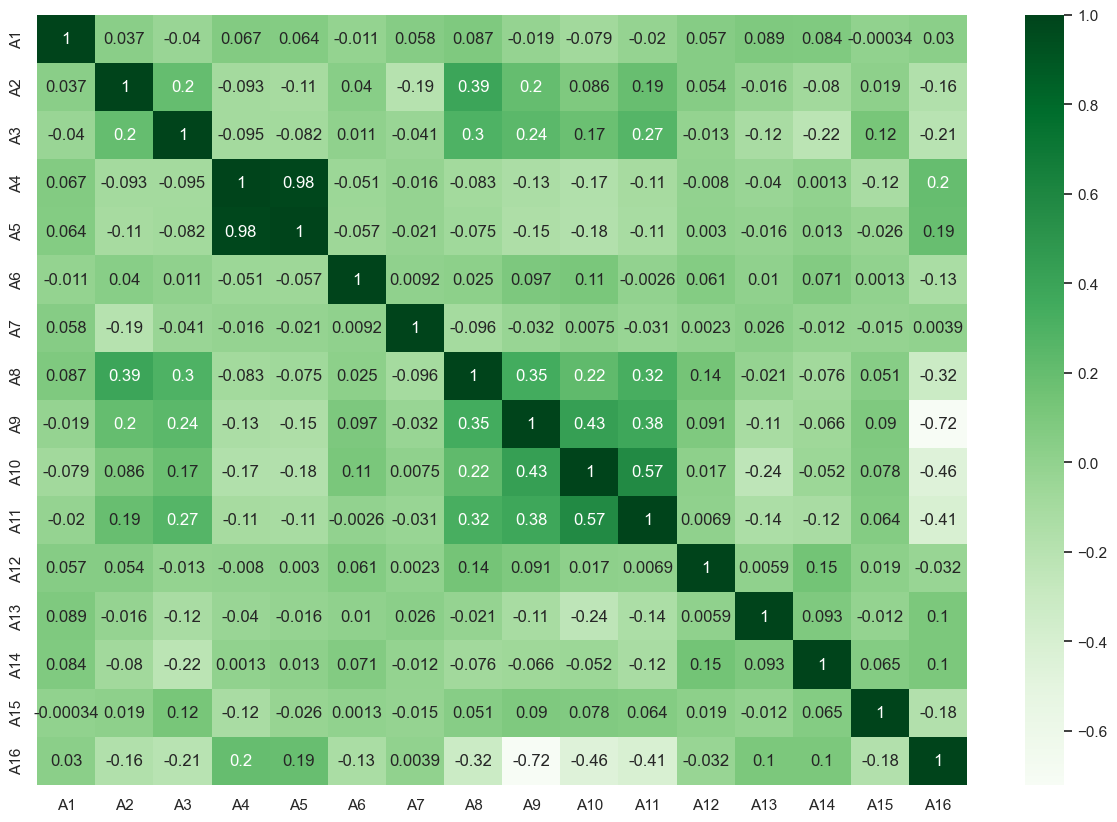

In [65]:
# use heatmap to know the correlation between x
plt.figure(figsize=(15, 10))
sns.heatmap(ca_df.corr(), cmap='Greens', annot=True)
plt.show()

#### Pairplot
https://study.com/academy/lesson/scatter-plot-and-correlation-definition-example-analysis.html#:~:text=A%20scatterplot%20with%20no%20correlation,pattern%2C%20neither%20positive%20nor%20negative.&text=The%20scatterplot%20shows%20haphazard%20points%20that%20follow%20no%20direction. 

<Figure size 1000x1000 with 0 Axes>

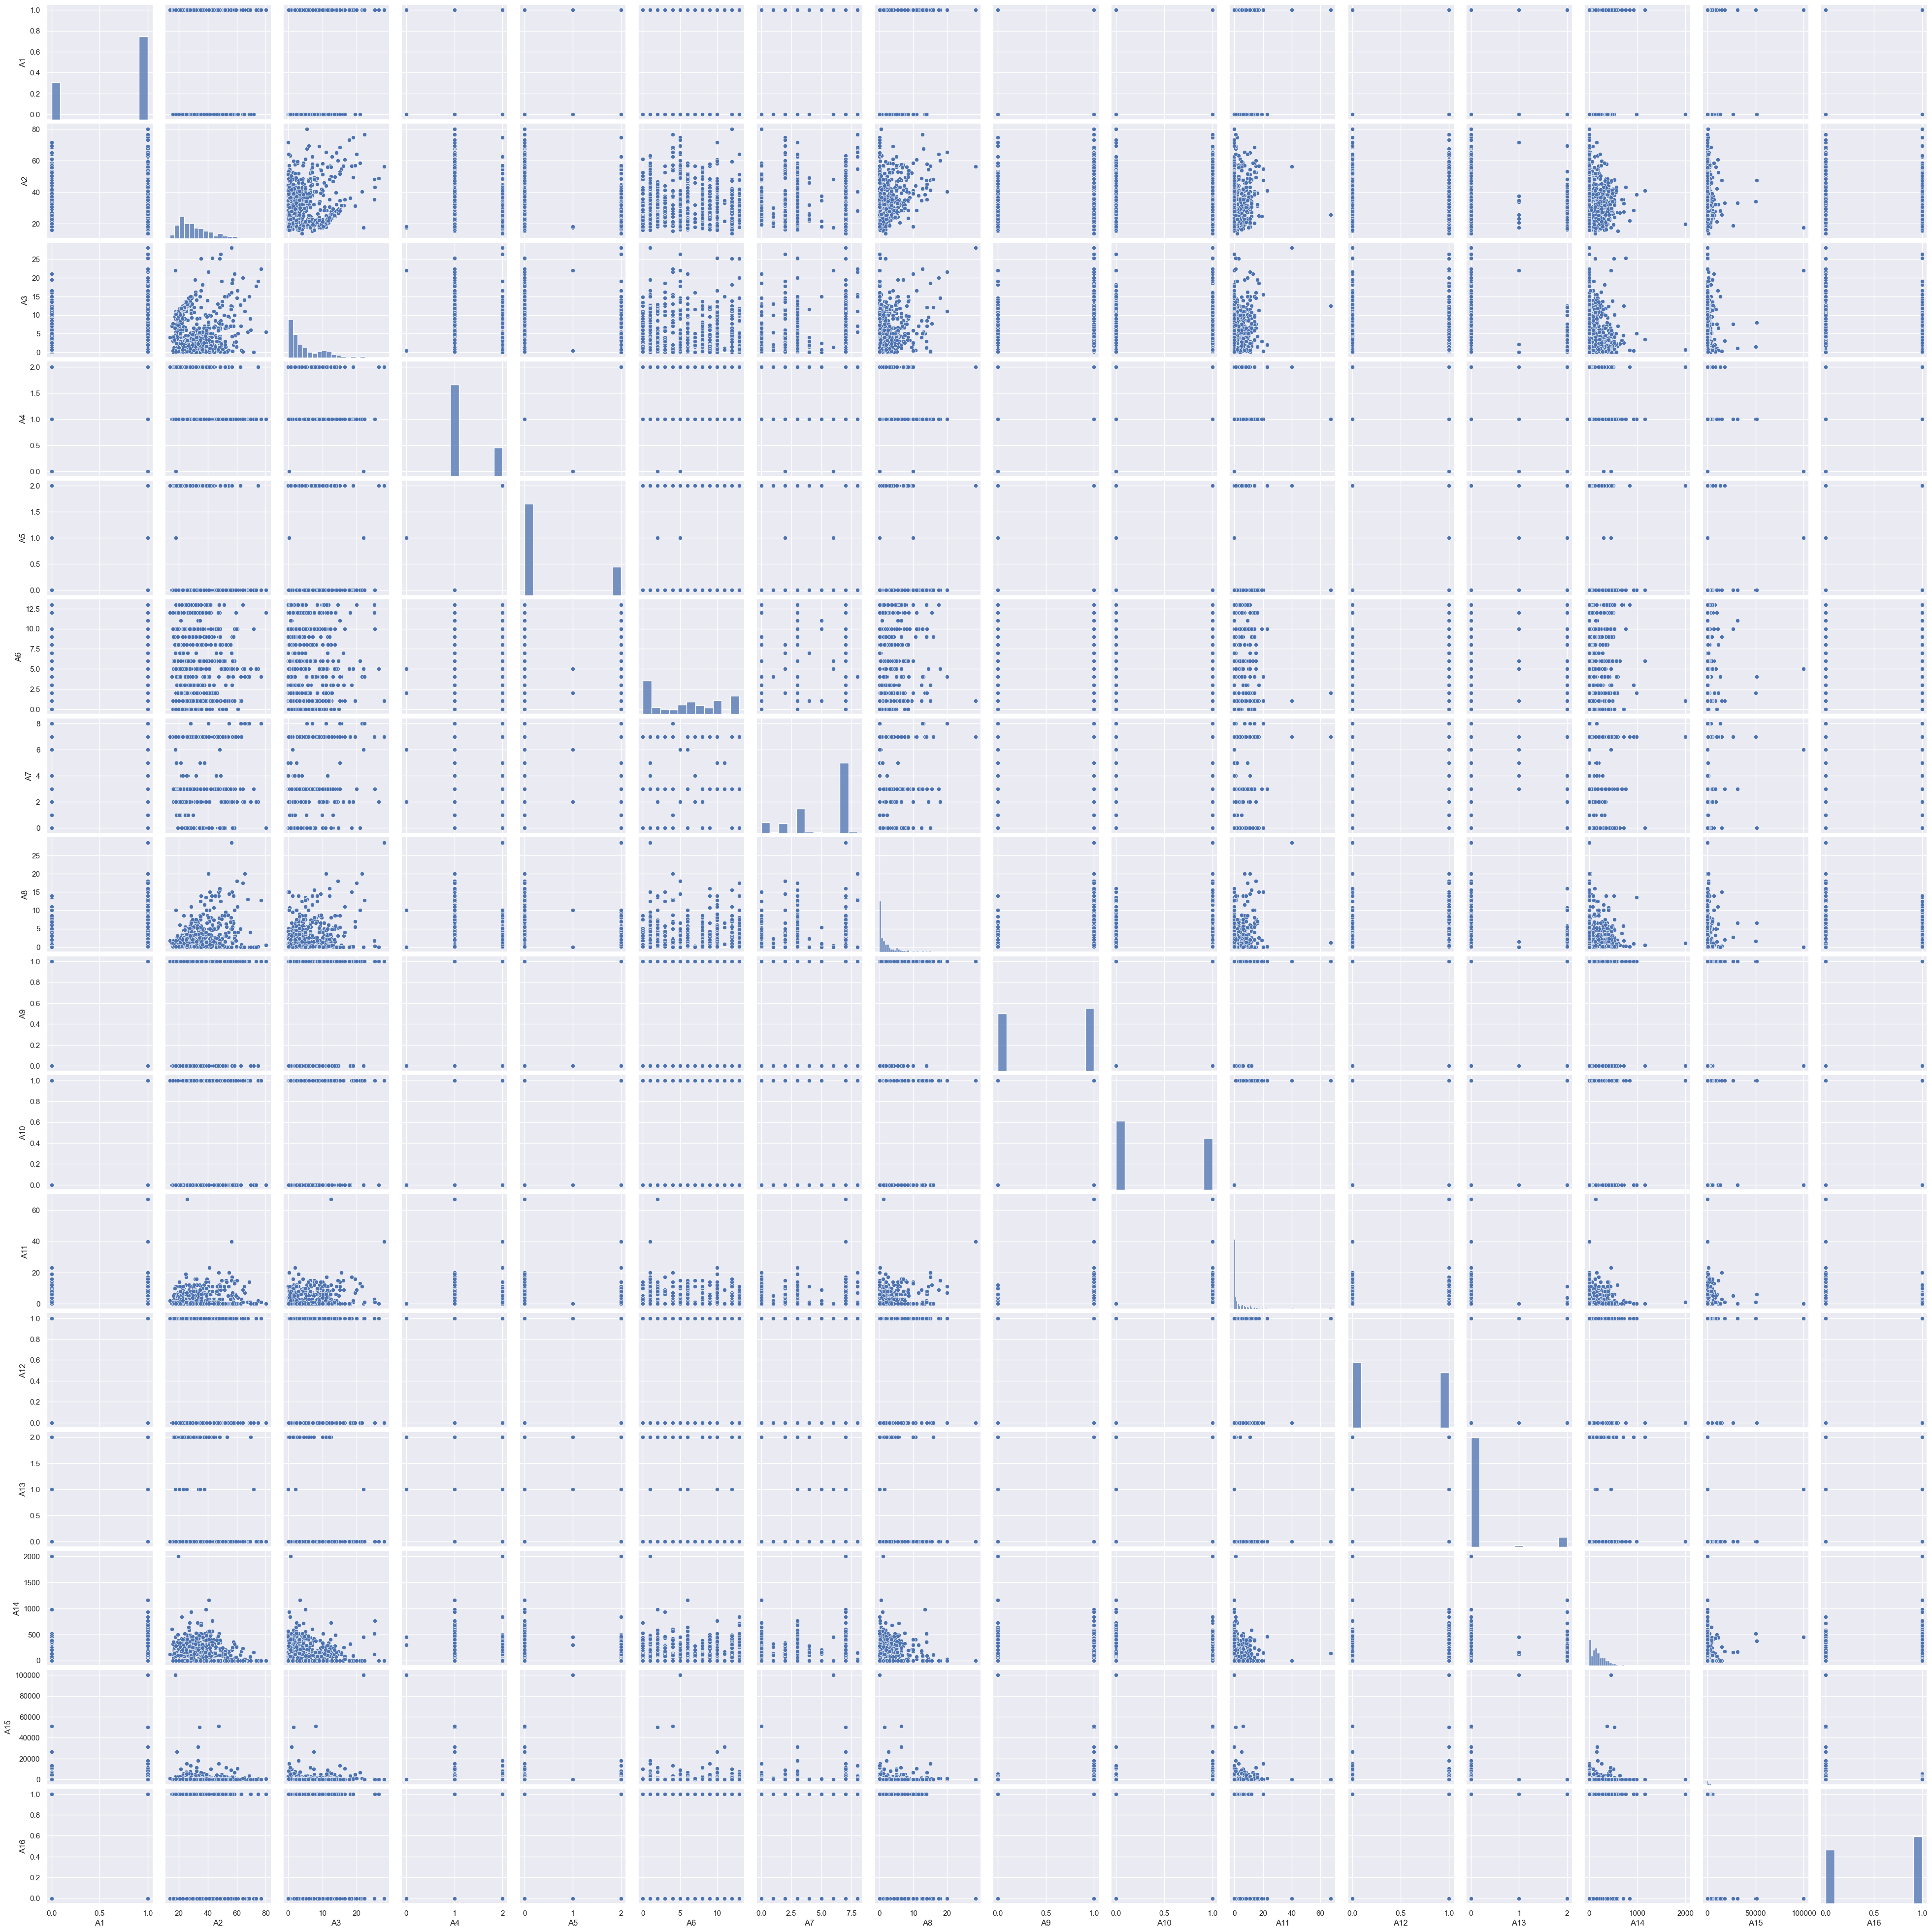

In [66]:
plt.figure(figsize=(10, 10))
sns.pairplot(ca_df)
plt.show()

### Outlier Detection
- A8, 11, 14, 15

#### A8

In [67]:
z = zscore(ca_df['A8'])

threshold = 3.5

outlier = ca_df[(z > threshold) | (z < -threshold)]

outlier

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
27,1.0,56.58,18.500,1.0,0.0,3.0,0.0,15.000,1.0,1.0,17,1.0,0.0,0.0,0,0.0
39,1.0,54.58,9.415,1.0,0.0,5.0,2.0,14.415,1.0,1.0,11,1.0,0.0,30.0,300,0.0
44,1.0,56.42,28.000,2.0,2.0,1.0,7.0,28.500,1.0,1.0,40,0.0,0.0,0.0,15,0.0
118,1.0,57.83,7.040,1.0,0.0,9.0,7.0,14.000,1.0,1.0,6,1.0,0.0,360.0,1332,0.0
171,1.0,41.33,0.000,1.0,0.0,1.0,0.0,15.000,1.0,0.0,0,0.0,0.0,0.0,0,0.0
180,1.0,47.67,0.290,1.0,0.0,1.0,0.0,15.000,1.0,1.0,20,0.0,0.0,0.0,15000,0.0
197,1.0,48.17,7.625,1.0,0.0,12.0,3.0,15.500,1.0,1.0,12,0.0,0.0,0.0,790,0.0
205,0.0,35.42,12.000,1.0,0.0,10.0,3.0,14.000,1.0,1.0,8,0.0,0.0,0.0,6590,0.0
212,1.0,60.08,14.500,1.0,0.0,5.0,2.0,18.000,1.0,1.0,15,1.0,0.0,0.0,1000,0.0
221,1.0,65.42,11.000,1.0,0.0,4.0,8.0,20.000,1.0,1.0,7,1.0,0.0,22.0,0,0.0


In [68]:
# due to dataset size is small, so rather than delete it, we try to replace it to more reasonable value 
outlier_indices = outlier.index  # Index of rows with outliers
column_with_outliers = 'A8'

# Replace the outlier values with the value from the previous row
for idx in outlier_indices:
    ca_df.loc[idx, column_with_outliers] = ca_df.loc[idx - 1, column_with_outliers]

In [69]:
ca_df.loc[outlier.index]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
27,1.0,56.58,18.500,1.0,0.0,3.0,0.0,5.165,1.0,1.0,17,1.0,0.0,0.0,0,0.0
39,1.0,54.58,9.415,1.0,0.0,5.0,2.0,0.250,1.0,1.0,11,1.0,0.0,30.0,300,0.0
44,1.0,56.42,28.000,2.0,2.0,1.0,7.0,8.625,1.0,1.0,40,0.0,0.0,0.0,15,0.0
118,1.0,57.83,7.040,1.0,0.0,9.0,7.0,6.290,1.0,1.0,6,1.0,0.0,360.0,1332,0.0
171,1.0,41.33,0.000,1.0,0.0,1.0,0.0,0.250,1.0,0.0,0,0.0,0.0,0.0,0,0.0
180,1.0,47.67,0.290,1.0,0.0,1.0,0.0,1.960,1.0,1.0,20,0.0,0.0,0.0,15000,0.0
197,1.0,48.17,7.625,1.0,0.0,12.0,3.0,3.165,1.0,1.0,12,0.0,0.0,0.0,790,0.0
205,0.0,35.42,12.000,1.0,0.0,10.0,3.0,0.085,1.0,1.0,8,0.0,0.0,0.0,6590,0.0
212,1.0,60.08,14.500,1.0,0.0,5.0,2.0,5.500,1.0,1.0,15,1.0,0.0,0.0,1000,0.0
221,1.0,65.42,11.000,1.0,0.0,4.0,8.0,2.290,1.0,1.0,7,1.0,0.0,22.0,0,0.0


##### Show again A8 distribute 

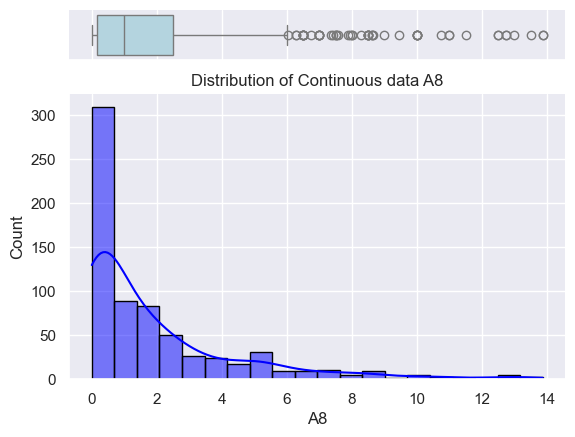

In [70]:
# target data 
x = ca_df['A8']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# box plot 
sns.boxplot(x=x, ax=ax_box, color='lightblue')

# histogram 
sns.histplot(x=x, bins=20, kde=True, ax=ax_hist, color='blue', edgecolor='black')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

plt.title("Distribution of Continuous data A8")

plt.show()

#### A11

In [71]:
z = zscore(ca_df['A11'])

threshold = 3.5

outlier = ca_df[(z > threshold) | (z < -threshold)]

outlier

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
44,1.0,56.42,28.00,2.0,2.0,1.0,7.0,8.625,1.0,1.0,40,0.0,0.0,0.0,15,0.0
46,0.0,41.00,2.04,2.0,2.0,10.0,3.0,0.125,1.0,1.0,23,1.0,0.0,455.0,1236,0.0
105,1.0,54.83,15.50,1.0,0.0,4.0,8.0,0.000,1.0,1.0,20,0.0,0.0,152.0,130,1.0
121,1.0,25.67,12.50,1.0,0.0,2.0,7.0,1.210,1.0,1.0,67,1.0,0.0,140.0,258,0.0
180,1.0,47.67,0.29,1.0,0.0,1.0,0.0,1.960,1.0,1.0,20,0.0,0.0,0.0,15000,0.0


In [72]:
# due to dataset size is small, so rather than delete it, we try to replace it to more reasonable value 
outlier_indices = outlier.index  # Index of rows with outliers
column_with_outliers = 'A11'

# Replace the outlier values with the value from the previous row
for idx in outlier_indices:
    ca_df.loc[idx, column_with_outliers] = ca_df.loc[idx - 1, column_with_outliers]

In [73]:
ca_df.loc[outlier.index]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
44,1.0,56.42,28.00,2.0,2.0,1.0,7.0,8.625,1.0,1.0,6,0.0,0.0,0.0,15,0.0
46,0.0,41.00,2.04,2.0,2.0,10.0,3.0,0.125,1.0,1.0,11,1.0,0.0,455.0,1236,0.0
105,1.0,54.83,15.50,1.0,0.0,4.0,8.0,0.000,1.0,1.0,2,0.0,0.0,152.0,130,1.0
121,1.0,25.67,12.50,1.0,0.0,2.0,7.0,1.210,1.0,1.0,1,1.0,0.0,140.0,258,0.0
180,1.0,47.67,0.29,1.0,0.0,1.0,0.0,1.960,1.0,1.0,14,0.0,0.0,0.0,15000,0.0


##### Show again A11 distribute 

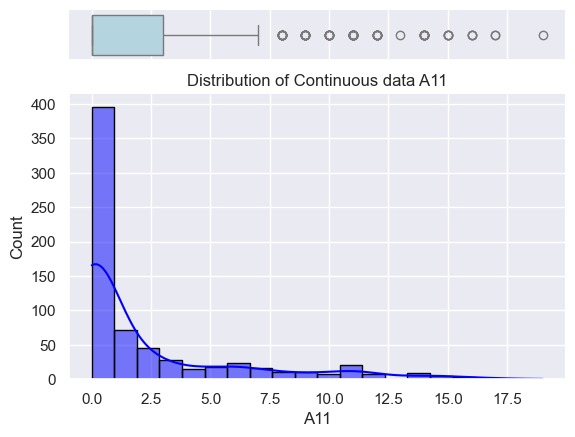

In [74]:
# target data 
x = ca_df['A11']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# box plot 
sns.boxplot(x=x, ax=ax_box, color='lightblue')

# histogram 
sns.histplot(x=x, bins=20, kde=True, ax=ax_hist, color='blue', edgecolor='black')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

plt.title("Distribution of Continuous data A11")

plt.show()

#### A14

In [75]:
z = zscore(ca_df['A14'])

threshold = 3.5

outlier = ca_df[(z > threshold) | (z < -threshold)]

outlier

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
72,0.0,38.58,5.000,1.0,0.0,2.0,7.0,13.500,1.0,0.0,0,1.0,0.0,980.0,0,1.0
86,1.0,28.46,0.375,1.0,0.0,3.0,7.0,0.875,1.0,0.0,0,1.0,2.0,928.0,0,1.0
327,1.0,40.83,3.500,1.0,0.0,6.0,0.0,0.500,0.0,0.0,0,0.0,2.0,1160.0,0,1.0
407,0.0,19.58,0.665,2.0,2.0,1.0,7.0,1.000,0.0,1.0,1,0.0,0.0,2000.0,2,1.0
572,1.0,21.92,0.540,2.0,2.0,13.0,7.0,0.040,1.0,1.0,1,1.0,0.0,840.0,59,0.0


In [76]:
# drop the value that is extremly large 
outlier = outlier.drop([327, 407])

ca_df = ca_df.drop([327, 407])

In [77]:
# due to dataset size is small, so rather than delete it, we try to replace it to more reasonable value 
outlier_indices = outlier.index  # Index of rows with outliers
column_with_outliers = 'A14'

# Replace the outlier values with the value from the previous row
for idx in outlier_indices:
    ca_df.loc[idx, column_with_outliers] = ca_df.loc[idx - 1, column_with_outliers]

In [78]:
ca_df.loc[outlier.index]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
72,0.0,38.58,5.000,1.0,0.0,2.0,7.0,13.500,1.0,0.0,0,1.0,0.0,160.0,0,1.0
86,1.0,28.46,0.375,1.0,0.0,3.0,7.0,0.875,1.0,0.0,0,1.0,2.0,280.0,0,1.0
572,1.0,21.92,0.540,2.0,2.0,13.0,7.0,0.040,1.0,1.0,1,1.0,0.0,160.0,59,0.0


##### Show again A14 distribute 

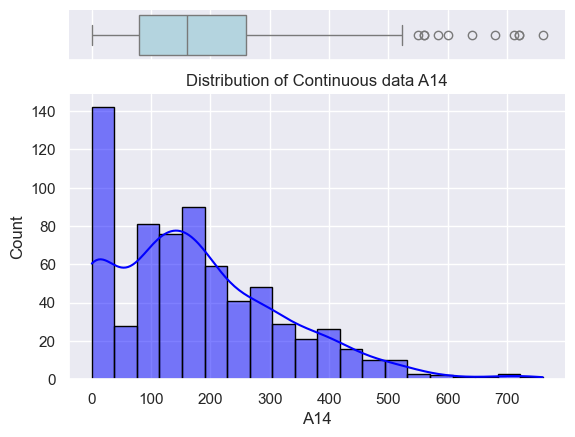

In [79]:
# target data 
x = ca_df['A14']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# box plot 
sns.boxplot(x=x, ax=ax_box, color='lightblue')

# histogram 
sns.histplot(x=x, bins=20, kde=True, ax=ax_hist, color='blue', edgecolor='black')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

plt.title("Distribution of Continuous data A14")

plt.show()

#### A15

In [80]:
z = zscore(ca_df['A15'])

threshold = 3.5

outlier = ca_df[(z > threshold) | (z < -threshold)]

outlier

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
6,1.0,33.17,1.04,1.0,0.0,11.0,3.0,6.50,1.0,0.0,0,1.0,0.0,164.0,31285,0.0
65,1.0,34.17,1.54,1.0,0.0,2.0,7.0,1.54,1.0,1.0,1,1.0,0.0,520.0,50000,0.0
132,0.0,47.42,8.00,1.0,0.0,4.0,0.0,6.50,1.0,1.0,6,0.0,0.0,375.0,51100,0.0
243,0.0,18.75,7.50,1.0,0.0,10.0,7.0,2.71,1.0,1.0,5,0.0,0.0,160.0,26726,0.0
317,1.0,17.50,22.00,0.0,1.0,5.0,6.0,0.00,0.0,0.0,0,1.0,1.0,450.0,100000,0.0


In [81]:
# drop 65, 132, 317
droplist = [65, 132, 317]

outlier = outlier.drop(droplist)

ca_df = ca_df.drop(droplist)

In [82]:
# due to dataset size is small, so rather than delete it, we try to replace it to more reasonable value 
outlier_indices = outlier.index  # Index of rows with outliers
column_with_outliers = 'A15'

# Replace the outlier values with the value from the previous row
for idx in outlier_indices:
    ca_df.loc[idx, column_with_outliers] = ca_df.loc[idx - 1, column_with_outliers]

In [83]:
ca_df.loc[outlier.index]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
6,1.0,33.17,1.04,1.0,0.0,11.0,3.0,6.50,1.0,0.0,0,1.0,0.0,164.0,0,0.0
243,0.0,18.75,7.50,1.0,0.0,10.0,7.0,2.71,1.0,1.0,5,0.0,0.0,160.0,0,0.0


##### Show again A15 distribut

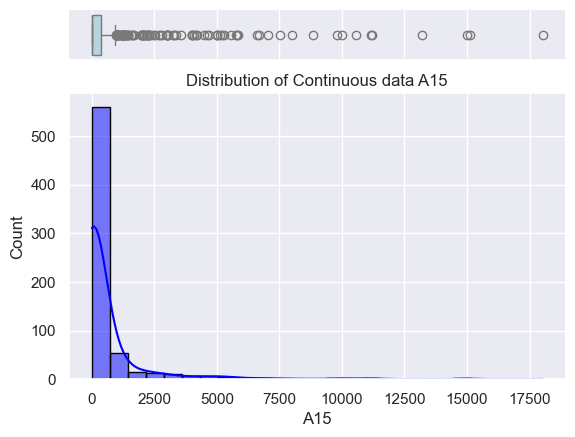

In [84]:
# target data 
x = ca_df['A15']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# box plot 
sns.boxplot(x=x, ax=ax_box, color='lightblue')

# histogram 
sns.histplot(x=x, bins=25, kde=True, ax=ax_hist, color='blue', edgecolor='black')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

plt.title("Distribution of Continuous data A15")

plt.show()

## Train_Test Split

In [85]:
ca_df = shuffle(ca_df)

In [86]:
x = ca_df.drop(columns=['A16']) 
y = ca_df['A16']

In [87]:
x.shape

(685, 15)

In [88]:
y.shape

(685,)

In [89]:
x.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
617,1.0,32.25,14.00,2.0,2.0,5.0,2.0,0.000,0.0,1.0,2,0.0,0.0,160.0,1
573,0.0,65.17,14.00,1.0,0.0,5.0,2.0,0.000,1.0,1.0,11,1.0,0.0,0.0,1400
129,0.0,28.42,3.50,1.0,0.0,12.0,7.0,0.835,1.0,0.0,0,0.0,2.0,280.0,0
113,0.0,33.75,0.75,1.0,0.0,8.0,0.0,1.000,1.0,1.0,3,1.0,0.0,212.0,0
164,0.0,60.58,16.50,1.0,0.0,10.0,7.0,11.000,1.0,0.0,0,1.0,0.0,21.0,10561


In [90]:
x = x.values

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
# training using x_train and y_train

# Random Forest Classification

In [92]:
# Import RandomForestClassifier and RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *

In [93]:
rf_clf = RandomForestClassifier()

### Parameters

In [94]:
# Do hyperparameter tuning

#Number of trees in random forest
n_estimators = [int(i) for i in range(50,300,50)]

#Maximum number of levels in tree
max_depth = [None, 10, 20, 30, 40]

#Minimum size of the end node
min_samples_split = [2, 4, 8]

#Measures the quality of each split
criterion = ['gini','entropy']

#class_weight
class_weight = ['None', 'balanced', 'balanced_subsample']

param_grid = {
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'max_depth': max_depth,
    'criterion': criterion
}

print(param_grid)

{'n_estimators': [50, 100, 150, 200, 250], 'min_samples_split': [2, 4, 8], 'max_depth': [None, 10, 20, 30, 40], 'criterion': ['gini', 'entropy']}


### Random search CV

In [95]:
random_search = RandomizedSearchCV(estimator = rf_clf, param_distributions = param_grid, cv = 15, scoring = 'accuracy', verbose = 2, n_jobs = 4)
rf_clf_RS = random_search.fit(x_train, y_train)

# Get the best parameters and the best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Fitting 15 folds for each of 10 candidates, totalling 150 fits
Best Parameters:  {'n_estimators': 50, 'min_samples_split': 8, 'max_depth': 20, 'criterion': 'entropy'}
Best Score:  0.871921921921922


In [96]:
#Predict train and test
rs_y_pred_rf_train = rf_clf_RS.predict(x_train)
rs_y_pred_rf_test = rf_clf_RS.predict(x_test)

print("Accuracy Train Data: ",accuracy_score(y_train, rs_y_pred_rf_train))
print("Accuracy Test Data: ",accuracy_score(y_test, rs_y_pred_rf_test))

Accuracy Train Data:  0.9653284671532847
Accuracy Test Data:  0.9051094890510949


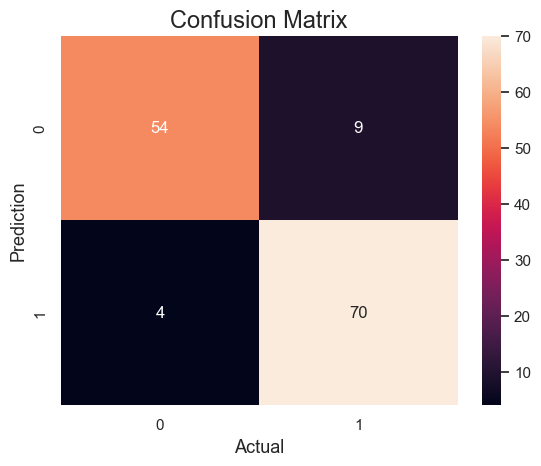

In [97]:
confusion_rf = confusion_matrix(y_test, rs_y_pred_rf_test)

sns.heatmap(confusion_rf, annot=True, fmt='d')

plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [98]:
print(classification_report(y_test, rs_y_pred_rf_test))
print("Mean Squared Error: ", mean_squared_error(y_test, rs_y_pred_rf_test))

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89        63
         1.0       0.89      0.95      0.92        74

    accuracy                           0.91       137
   macro avg       0.91      0.90      0.90       137
weighted avg       0.91      0.91      0.90       137

Mean Squared Error:  0.0948905109489051


### Grid Search CV

In [99]:
# Do hyperparameter tuning

# Set up GridSearchCV
grid_search = GridSearchCV(estimator = rf_clf, param_grid = param_grid, cv = 5, scoring='accuracy', n_jobs = 4)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

C:\Users\jeanl\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.8685404503753128


In [100]:
# #Predict train and test
gs_y_pred_rf_train = rf_clf_RS.predict(x_train)
gs_y_pred_rf_test = rf_clf_RS.predict(x_test)

print("Accuracy Train Data: ",accuracy_score(y_train, gs_y_pred_rf_train))
print("Accuracy Test Data: ",accuracy_score(y_test, gs_y_pred_rf_test))

Accuracy Train Data:  0.9653284671532847
Accuracy Test Data:  0.9051094890510949


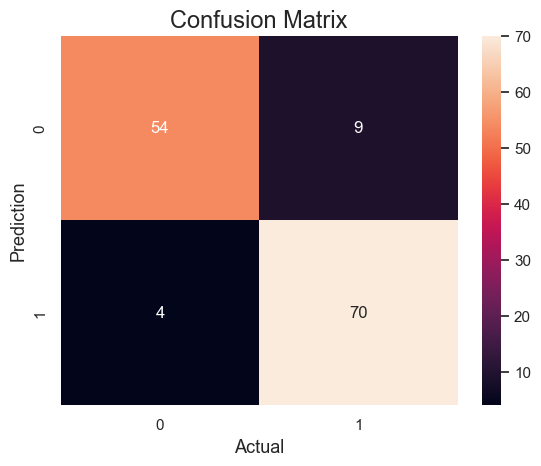

In [101]:
confusion_rf = confusion_matrix(y_test, gs_y_pred_rf_test)

sns.heatmap(confusion_rf, annot=True, fmt='d')

plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [102]:
print(classification_report(y_test, gs_y_pred_rf_test))
print("Mean Squared Error: ", mean_squared_error(y_test, gs_y_pred_rf_test))

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89        63
         1.0       0.89      0.95      0.92        74

    accuracy                           0.91       137
   macro avg       0.91      0.90      0.90       137
weighted avg       0.91      0.91      0.90       137

Mean Squared Error:  0.0948905109489051


### MinMaxScale (Random Seach CV)
* Random Forest is not sensitive to the scale

In [103]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [104]:
rf_clf_RS = random_search.fit(x_train_scaled, y_train)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


In [105]:
#Predict train and test
rs_y_pred_rf_train = rf_clf_RS.predict(x_train_scaled)
rs_y_pred_rf_test = rf_clf_RS.predict(x_test_scaled)

print("Accuracy Train Data: ",accuracy_score(y_train, rs_y_pred_rf_train))
print("Accuracy Test Data: ",accuracy_score(y_test, rs_y_pred_rf_test))

Accuracy Train Data:  1.0
Accuracy Test Data:  0.8978102189781022


### Results

In [106]:
accuracyRF = accuracy_score(y_test, rs_y_pred_rf_test)*100
precisionRF = precision_score(y_test, rs_y_pred_rf_test)*100
recallRF = recall_score(y_test, rs_y_pred_rf_test)*100
f1RF = f1_score(y_test, rs_y_pred_rf_test)*100
rocAucRF = roc_auc_score(y_test, rs_y_pred_rf_test)*100

print('Accuracy : %.5f' %(accuracyRF))
print('Precision : %.5f' %(precisionRF))
print('Recall / Sensitivity (True Positive Rate) : %.5f' %(recallRF))
print('F1 Score : %.5f' %(f1RF))
print('AUC Score : %.5f' %(rocAucRF))

Accuracy : 89.78102
Precision : 88.46154
Recall / Sensitivity (True Positive Rate) : 93.24324
F1 Score : 90.78947
AUC Score : 89.47876
